In [1]:
# load data 1

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import pickle
import ipywidgets as widgets
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from scipy import sparse
from matplotlib import cm
import cmocean

cmap_phase = cmocean.cm.phase
cmap_hot = cm.get_cmap('hot')
cmap_viridis = cm.get_cmap('viridis')

execfile('Stimulus.py')
data_folder = "Data/"

stim_file = "Stiminfo_PVCre_2021_0012_s06_e14.csv"
stim = pd.read_csv(data_folder+stim_file)

spike_times_file = "Spiketimes_PVCre_2021_0012_s06_e14.npy"
spike_times = np.load(data_folder+spike_times_file, allow_pickle=True)
active = [len(spike_times[i]) > 0 for i in range(len(spike_times))]
spike_times = spike_times[np.where(active)]

num_unit = len(spike_times)
num_trial = len(stim)

# sort by firing rate

num_spike = list(map(len, spike_times))
# num_spike = np.array([len(spike_times[i]) for i in range(len(spike_times))])
spike_times = spike_times[np.argsort(num_spike)[::-1]]
execfile('load.py')

max_delay = 300 # dt
tau_id_range = np.arange(max_delay)

latest_spike_time = max([np.max(s) for s in spike_times if len(s)])
latest_stim_offtime = list(stim['stim_offtime'])[-1]
experiment_dur = max([latest_spike_time, latest_stim_offtime])

dt = 0.001 # 1 ms
exp_time = np.arange(0, experiment_dur, dt)
M = len(exp_time)

# binary spike and stimulus trains
B_stim = {}
for key in key_list:
    B_stim[key] = []
    for stim_id, trials in enumerate(stim_id_trial[key]):
        B_stim[key].append([])
        s = []
        for trial_id in trials:
            t_on, t_off = stim['stim_ontime'][trial_id], stim['stim_offtime'][trial_id]
            s += list(np.arange(int(t_on//dt), int(t_off//dt)))

        B_stim[key][stim_id] = sparse.coo_matrix((np.ones(len(s)), (np.zeros(len(s), dtype=int), s)), shape=(1, M))
s = spike_times//dt
B_spike = []
for unit_id in range(num_unit):
    B_spike.append(sparse.coo_matrix((np.ones(len(s[unit_id])), (np.zeros(len(s[unit_id]), dtype=int), np.int0(s[unit_id]))), shape=(1, M)))

# histogram error bars: num spikes
s = np.zeros((num_unit, 2))
for unit_id in range(num_unit):
    # print("unit: %d"%unit_id)
    a = np.zeros(len(tau_id_range))
    for tau_id in tau_id_range:
        a[tau_id] = np.sum(B_spike[unit_id].col >= tau_id)
    
    s[unit_id] = [np.mean(a), np.std(a)]

key_symbol = {'pair':'$(\\theta,\phi)$', 'orientation':'$\\theta$', 'phase':'$\phi$'}

# 2D tuning
avg_firing_rate_pair = np.array([sts.zscore(stim_hist['pair'][unit_id]).reshape((len(tau_id_range), num_stim['orientation'], num_stim['phase'])) for unit_id in range(num_unit)])

sorted_spike_num = np.sort(num_spike)[::-1]
cutoff_num_spike = 1000
num_unit = np.sum(sorted_spike_num > cutoff_num_spike)
for key in key_list:
    stim_hist[key] = stim_hist[key][:num_unit]

opt_time = np.load('optimal_time.npy')
stim_val_pair = pd.DataFrame(stim_val['pair'], columns=['orientation', 'phase'])

stim_data.pkl
dict_keys(['stim_val', 'trial_stim_id', 'key_list', 'num_trial', 'trial_pair_id', 'pair_val', 'pair_trial_id', 'stim_id_trial', 'num_stim'])
spike_data.pkl
dict_keys(['spike_count_rate', 'avg_firing_rate', 'sem_firing_rate', 'firing_rate', 'stim_num_trial', 'C_r_fphi_theta', 'theta_hist', 'phase_hist', 'pair_hist'])
corr_data.pkl
dict_keys(['corr_stim_unit', 'optimal_avg_firing_rate', 'stim_hist', 'stim_hist_caution'])


In [32]:
# load data 0

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import pickle
import ipywidgets as widgets
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from scipy import sparse
from matplotlib import cm

cmap_hot = cm.get_cmap('hot')
cmap_viridis = cm.get_cmap('viridis')

execfile('Stimulus.py')
data_folder = "Data/"

stim_file = "Stiminfo_PVCre_2021_0012_s06_e14.csv"
stim = pd.read_csv(data_folder+stim_file)

spike_times_file = "Spiketimes_PVCre_2021_0012_s06_e14.npy"
spike_times = np.load(data_folder+spike_times_file, allow_pickle=True)
active = [len(spike_times[i]) > 0 for i in range(len(spike_times))]
spike_times = spike_times[np.where(active)]

num_unit = len(spike_times)
num_trial = len(stim)

# sort by firing rate

num_spike = list(map(len, spike_times))
# num_spike = np.array([len(spike_times[i]) for i in range(len(spike_times))])
spike_times = spike_times[np.argsort(num_spike)[::-1]]
execfile('load.py')

max_delay = 300 # dt
tau_id_range = np.arange(max_delay)

latest_spike_time = max([np.max(s) for s in spike_times if len(s)])
latest_stim_offtime = list(stim['stim_offtime'])[-1]
experiment_dur = max([latest_spike_time, latest_stim_offtime])

dt = 0.001 # 1 ms
exp_time = np.arange(0, experiment_dur, dt)
M = len(exp_time)

# binary spike and stimulus trains
B_stim = {}
for key in key_list:
    B_stim[key] = []
    for stim_id, trials in enumerate(stim_id_trial[key]):
        B_stim[key].append([])
        s = []
        for trial_id in trials:
            t_on, t_off = stim['stim_ontime'][trial_id], stim['stim_offtime'][trial_id]
            s += list(np.arange(int(t_on//dt), int(t_off//dt)))

        B_stim[key][stim_id] = sparse.coo_matrix((np.ones(len(s)), (np.zeros(len(s), dtype=int), s)), shape=(1, M))
s = spike_times//dt
B_spike = []
for unit_id in range(num_unit):
    B_spike.append(sparse.coo_matrix((np.ones(len(s[unit_id])), (np.zeros(len(s[unit_id]), dtype=int), np.int0(s[unit_id]))), shape=(1, M)))

# histogram error bars: num spikes
s = np.zeros((num_unit, 2))
for unit_id in range(num_unit):
    # print("unit: %d"%unit_id)
    a = np.zeros(len(tau_id_range))
    for tau_id in tau_id_range:
        a[tau_id] = np.sum(B_spike[unit_id].col >= tau_id)
    
    s[unit_id] = [np.mean(a), np.std(a)]

key_symbol = {'pair':'$(\\theta,\phi)$', 'orientation':'$\\theta$', 'phase':'$\phi$'}

# 2D tuning
avg_firing_rate_pair = np.array([sts.zscore(stim_hist['pair'][unit_id]).reshape((len(tau_id_range), num_stim['orientation'], num_stim['phase'])) for unit_id in range(num_unit)])


import sys
sys.path.insert(0, './Persistent_Homology')

from gratings import grating_model
from plotting import plot_data, plot_mean_against_index, show_feature
from persistence import persistence
from decoding import cohomological_parameterization, remove_feature
from noisereduction import *
from sklearn.decomposition import PCA 

# relabelling
param = np.arange(400).reshape(20,20)
phase_ref = 10
x = param[:phase_ref]
reparam = np.vstack((x, x[:,::-1]))
stim_val_reparam = {}
stim_val_reparam['phase'] = stim_val['phase'][:phase_ref]
stim_val_reparam['orientation'] = np.concatenate((stim_val['orientation'], stim_val['orientation']+180))


opt_time = np.load('optimal_time.npy')

stim_data.pkl
dict_keys(['stim_val', 'trial_stim_id', 'key_list', 'num_trial', 'trial_pair_id', 'pair_val', 'pair_trial_id', 'stim_id_trial', 'num_stim'])
spike_data.pkl
dict_keys(['spike_count_rate', 'avg_firing_rate', 'sem_firing_rate', 'firing_rate', 'stim_num_trial', 'C_r_fphi_theta', 'theta_hist', 'phase_hist', 'pair_hist'])
corr_data.pkl
dict_keys(['corr_stim_unit', 'optimal_avg_firing_rate', 'stim_hist', 'stim_hist_caution'])


In [34]:
# load data

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import pickle
import ipywidgets as widgets
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from scipy import sparse
from matplotlib import cm

# color maps
cmap_hot = cm.get_cmap('hot')
cmap_viridis = cm.get_cmap('viridis')
cmap_jet = cm.get_cmap('jet')

# load and process stimuli
execfile('Stimulus.py')
data_folder = "Data/"
stim_file = "Stiminfo_PVCre_2021_0012_s06_e14.csv"
stim = pd.read_csv(data_folder+stim_file)
num_trial = len(stim)

# load and process spikes
spike_times_file = "Spiketimes_PVCre_2021_0012_s06_e14.npy"
spike_times = np.load(data_folder+spike_times_file, allow_pickle=True)
active = [len(spike_times[i]) > 0 for i in range(len(spike_times))]
spike_times = spike_times[np.where(active)]
num_unit = len(spike_times)


# sort by firing rate
num_spike = list(map(len, spike_times))
spike_times = spike_times[np.argsort(num_spike)[::-1]]
execfile('load.py')

# reverse correlation time offset range 
max_delay = 300 # dt
tau_id_range = np.arange(max_delay)

# experiment duration
latest_spike_time = max([np.max(s) for s in spike_times if len(s)])
latest_stim_offtime = list(stim['stim_offtime'])[-1]
experiment_dur = max([latest_spike_time, latest_stim_offtime])

dt = 0.001 # 1 ms
exp_time = np.arange(0, experiment_dur, dt)
M = len(exp_time)

# binary spike and stimulus trains
B_stim = {}
for key in key_list:
    B_stim[key] = []
    for stim_id, trials in enumerate(stim_id_trial[key]):
        B_stim[key].append([])
        s = []
        for trial_id in trials:
            t_on, t_off = stim['stim_ontime'][trial_id], stim['stim_offtime'][trial_id]
            s += list(np.arange(int(t_on//dt), int(t_off//dt)))

        B_stim[key][stim_id] = sparse.coo_matrix((np.ones(len(s)), (np.zeros(len(s), dtype=int), s)), shape=(1, M))
s = spike_times//dt
B_spike = []
for unit_id in range(num_unit):
    B_spike.append(sparse.coo_matrix((np.ones(len(s[unit_id])), (np.zeros(len(s[unit_id]), dtype=int), np.int0(s[unit_id]))), shape=(1, M)))

# histogram error bars: num spikes
# spike_count = np.zeros((num_unit, 2))
# for unit_id in range(num_unit):
#     # print("unit: %d"%unit_id)
#     a = np.zeros(len(tau_id_range))
#     for tau_id in tau_id_range:
#         a[tau_id] = np.sum(B_spike[unit_id].col >= tau_id)
    
#     spike_count[unit_id] = [np.mean(a), np.std(a)]

key_symbol = {'pair':'$(\\theta,\phi)$', 'orientation':'$\\theta$', 'phase':'$\phi$'}

# 2D tuning
avg_firing_rate_pair = np.array([sts.zscore(stim_hist['pair'][unit_id]).reshape((len(tau_id_range), num_stim['orientation'], num_stim['phase'])) for unit_id in range(num_unit)])

sorted_spike_num = np.sort(num_spike)[::-1]
cutoff_num_spike = 1000
num_unit = np.sum(sorted_spike_num > cutoff_num_spike)
for key in key_list:
    stim_hist[key] = stim_hist[key][:num_unit]


from tqdm import trange
import sys
sys.path.insert(0, './Persistent_Homology')

import gratings
import decorator
from noisereduction import *

stim_data.pkl
dict_keys(['stim_val', 'trial_stim_id', 'key_list', 'num_trial', 'trial_pair_id', 'pair_val', 'pair_trial_id', 'stim_id_trial', 'num_stim'])
spike_data.pkl
dict_keys(['spike_count_rate', 'avg_firing_rate', 'sem_firing_rate', 'firing_rate', 'stim_num_trial', 'C_r_fphi_theta', 'theta_hist', 'phase_hist', 'pair_hist'])
corr_data.pkl
dict_keys(['corr_stim_unit', 'optimal_avg_firing_rate', 'stim_hist', 'stim_hist_caution'])


Optimal time independently for each unit

In [35]:
# Z = sts.zscore([stim_hist['pair'][unit_id, opt_time[unit_id], :].T for unit_id in range(num_unit)], axis=0) 
# taking zscore does not make sense since we are dealing with probability distributions as activity not firing rate
# Z = Z[:, np.logical_not(np.isnan(Z[0]))]
# n_components = len(Z[0])
from sklearn.decomposition import PCA
from scipy.stats import zscore
n_components = 20
pca = PCA(n_components)
data = pd.DataFrame([stim_hist['pair'][unit_id, opt_time[unit_id], :] for unit_id in range(num_unit)]).T
# X = pca.fit_transform(data)

In [36]:
ncomp = 20
data = PCA_reduction(data, ncomp)

PCA explained variance:
[0.16646987 0.10646209 0.07980927 0.07637544 0.07305655 0.06312245
 0.0520563  0.05141274 0.0436141  0.04114367 0.0392689  0.02982529
 0.02595947 0.02514927 0.02247076 0.01964191 0.01509293 0.01312476
 0.01038999 0.0080545 ]


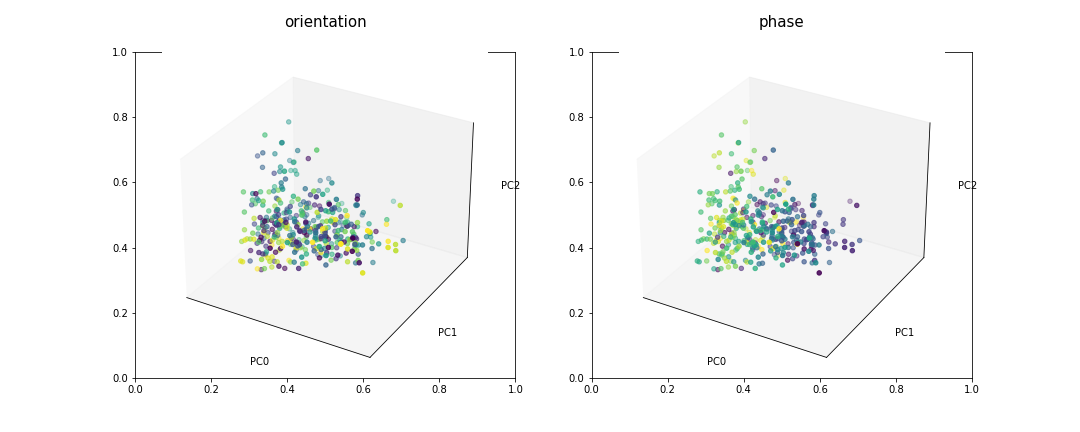

In [37]:
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
%matplotlib widget

X = data.to_numpy()
x, y, z = X[:,0], X[:,1], X[:,2]

fig, ax = plt.subplots(1, 2, figsize=(15, 6))
for i, color_key in enumerate(key_list[1:]):
    ax[i] = fig.add_subplot(1, 2, i+1, projection='3d')
    ax[i].scatter3D(x, y, z, c=stim_val_pair[color_key])
    ax[i].set_title(color_key, pad=25, size=15)
    ax[i].set_xlabel("PC0") 
    ax[i].set_ylabel("PC1") 
    ax[i].set_zlabel("PC2")
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_zticks([])

plt.show()

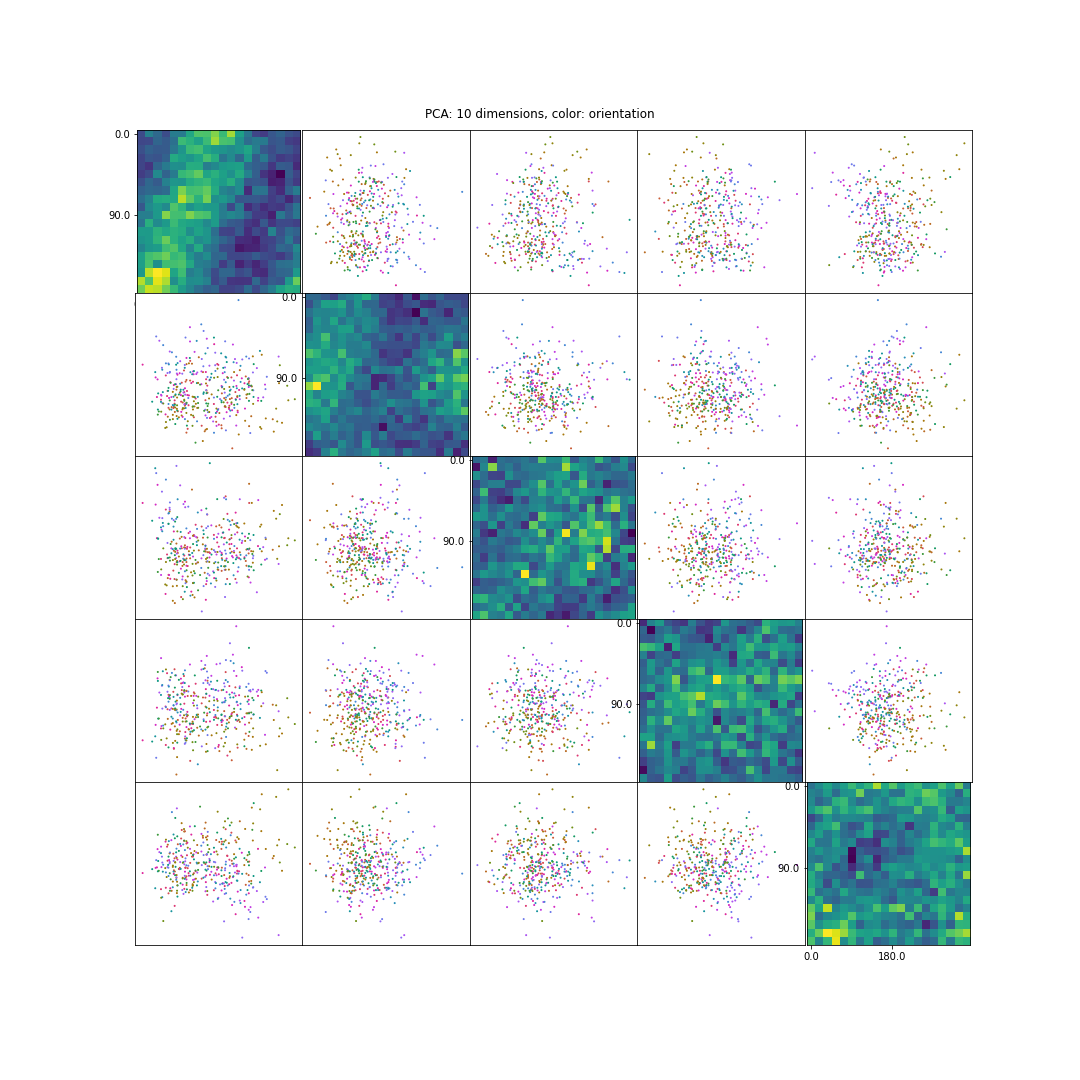

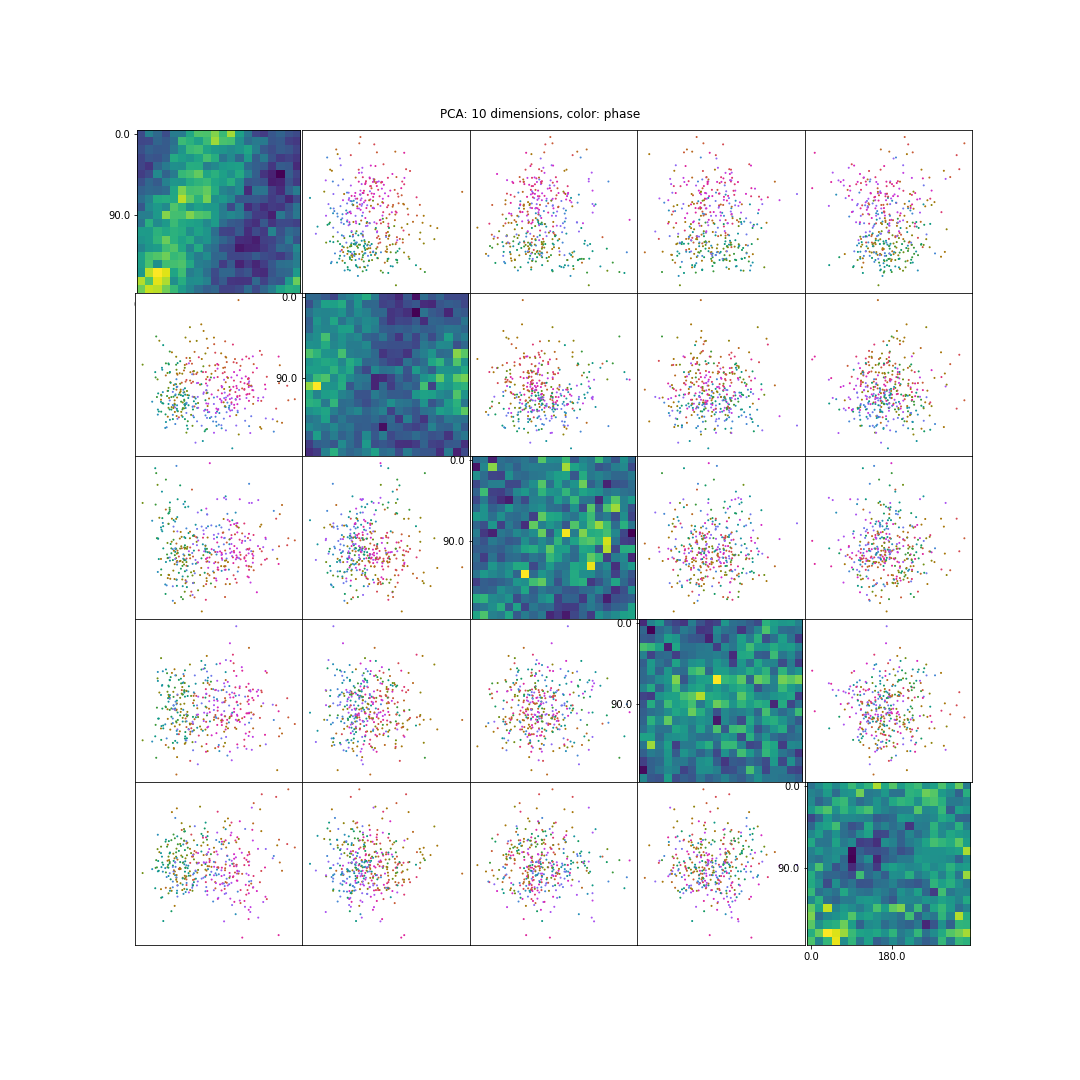

In [38]:
# plot PCA
ncomp_disp = 5
for color_key in key_list[1:]:
    fig = plt.figure(figsize=(15,15))
    for i in range(ncomp_disp):
        for j in range(ncomp_disp):
            ax = plt.subplot(ncomp_disp,ncomp_disp, j + ncomp_disp*i + 1)
            if i==j:
                ax.imshow(X[:,i].reshape(20,20))
                ax.set_xticks(np.arange(20)[::10])
                ax.set_xticklabels(stim_val['phase'][::10])
                ax.set_yticks(np.arange(20)[::10])
                ax.set_yticklabels(stim_val['orientation'][::10])

            else:
                ax.scatter(X[:,j], X[:,i], s=1, c=360*stim_val_pair[color_key]/stim_period[color_key], cmap=cmap_phase)
                ax.set_xticks([])
                ax.set_yticks([])

    fig.suptitle('PCA: 10 dimensions, color: '+color_key, y=0.9)
    plt.subplots_adjust(hspace=0, wspace=0)
    fig.savefig('embed10d_fig\embed10d_pca_color_cyclic_'+color_key+'.png')

In [39]:
data_top_denoised = top_noise_reduction(data, n=100, omega=0.2, fraction=0.1, plot=False)

Topological noise reduction: 100%|██████████| 100/100 [00:12<00:00,  8.07it/s]


ValueError: 'c' argument has 400 elements, which is inconsistent with 'x' and 'y' with size 40.

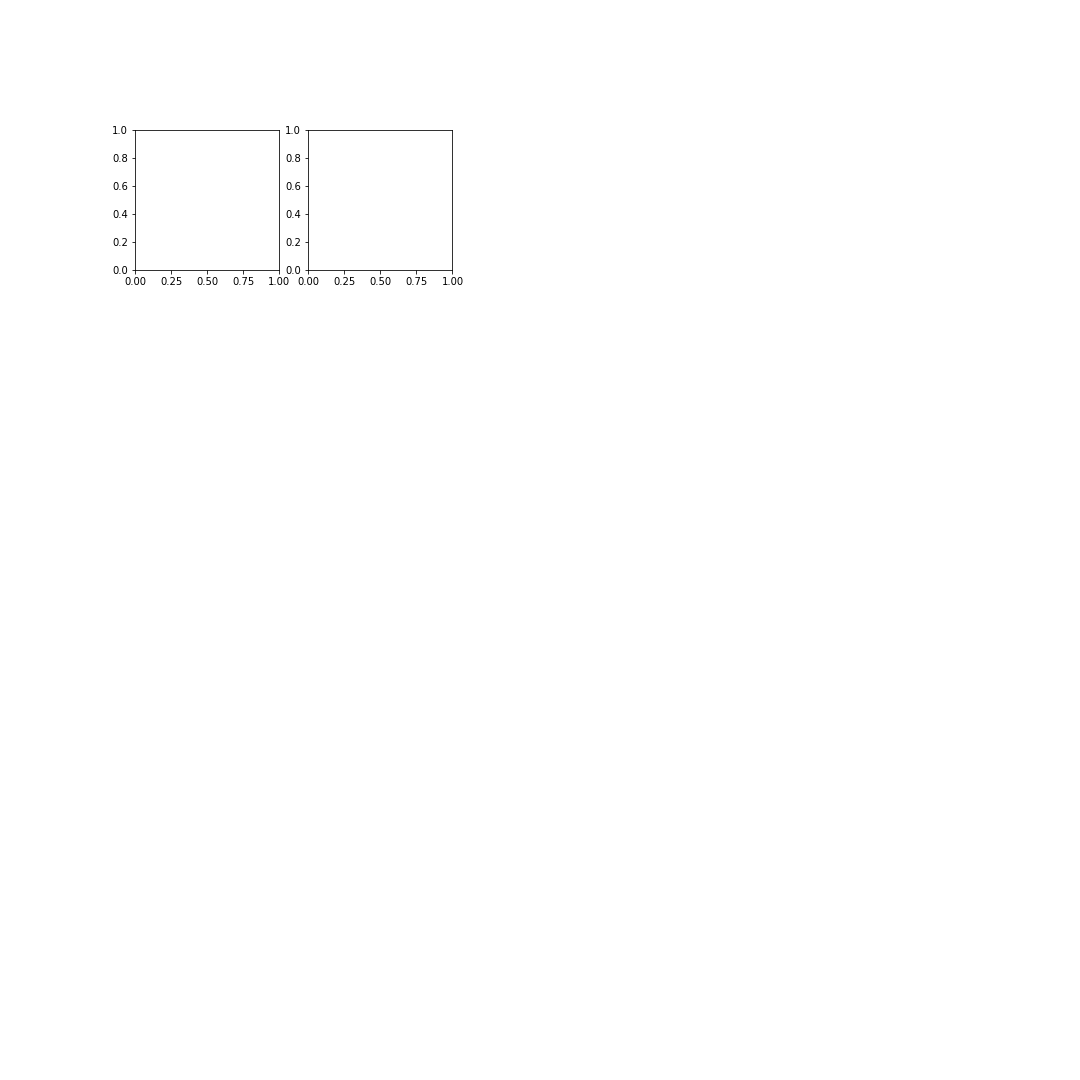

In [47]:
# plot PCA
data_top_arr = data_top_denoised.to_numpy()
ncomp_disp = 5
for color_key in key_list[1:]:
    fig = plt.figure(figsize=(15,15))
    for i in range(ncomp_disp):
        for j in range(ncomp_disp):
            ax = plt.subplot(ncomp_disp,ncomp_disp, j + ncomp_disp*i + 1)
            if i==j:
                # ax.imshow(data_top_arr[:,i].reshape(20,20))
                # ax.set_xticks(np.arange(20)[::10])
                # ax.set_xticklabels(stim_val['phase'][::10])
                # ax.set_yticks(np.arange(20)[::10])
                # ax.set_yticklabels(stim_val['orientation'][::10])
                i=j

            else:
                ax.scatter(data_top_arr[:,j], data_top_arr[:,i], s=1, c=360*stim_val_pair[color_key]/stim_period[color_key], cmap=cmap_phase)
                ax.set_xticks([])
                ax.set_yticks([])

    fig.suptitle('PCA: 10 dimensions, color: '+color_key, y=0.9)
    plt.subplots_adjust(hspace=0, wspace=0)
    fig.savefig('embed10d_fig\embed10d_pca_color_cyclic_'+color_key+'.png')

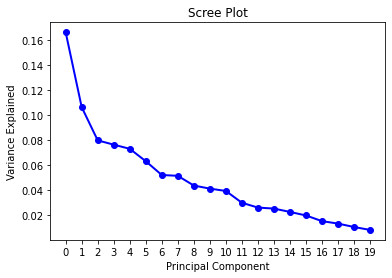

In [3]:
%matplotlib inline
PC_values = np.arange(n_components)
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xticks(np.arange(20))
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

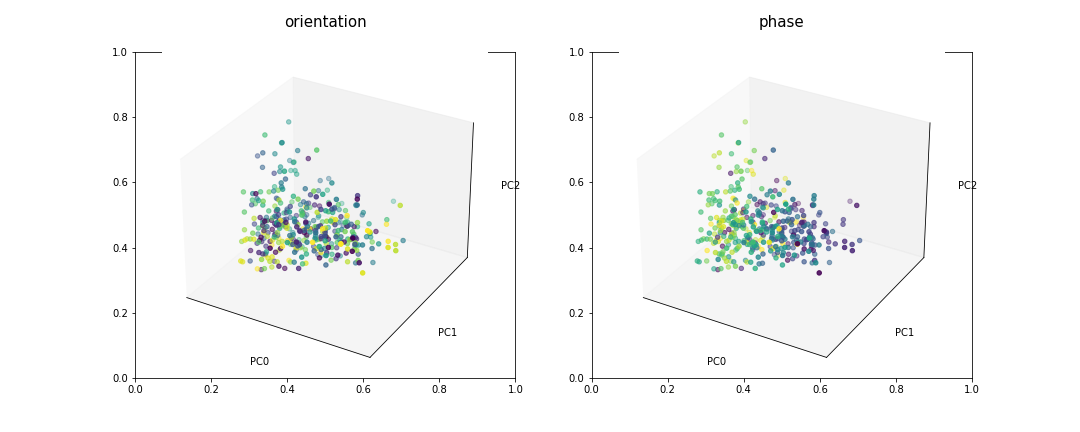

In [29]:
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
%matplotlib widget

x, y, z = X[:,0], X[:,1], X[:,2]

fig, ax = plt.subplots(1, 2, figsize=(15, 6))
for i, color_key in enumerate(key_list[1:]):
    ax[i] = fig.add_subplot(1, 2, i+1, projection='3d')
    ax[i].scatter3D(x, y, z, c=stim_val_pair[color_key])
    ax[i].set_title(color_key, pad=25, size=15)
    ax[i].set_xlabel("PC0") 
    ax[i].set_ylabel("PC1") 
    ax[i].set_zlabel("PC2")
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_zticks([])

plt.show()

In [30]:
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
%matplotlib widget


@widgets.interact(phase_id = widgets.IntSlider(5,0,19))

def phase_sec(phase_id):
    fig, ax = plt.subplots(1, 2, figsize=(10, 6))
    ax[0] = fig.add_subplot(1, 2, 1, projection='3d')
    phase_sec_id = stim_val['pair'][:,1] == stim_val['phase'][phase_id]
    x, y, z = X[phase_sec_id, 0], X[phase_sec_id,1], X[phase_sec_id,2]
    ax[0].scatter3D(x, y, z, c=stim_val['pair'][phase_sec_id,0])
    ax[0].set_title("orientation", pad=25, size=15)
    ax[0].set_xlabel("X") 
    ax[0].set_ylabel("Y") 
    ax[0].set_zlabel("Z")

    ax[1] = fig.add_subplot(1, 2, 2, projection='3d')
    x, y, z = X[:,0], X[:,1], X[:,2]
    ax[1].scatter3D(x, y, z, c=stim_val['pair'][:,1])
    ax[1].set_title("phase", pad=25, size=15)
    ax[1].set_xlabel("X") 
    ax[1].set_ylabel("Y") 
    ax[1].set_zlabel("Z")
    plt.show()

interactive(children=(IntSlider(value=5, description='phase_id', max=19), Output()), _dom_classes=('widget-int…

In [31]:
# @title run a manifold embedding algorithm (UMAP) in two or three dimensions. 
# !pip install umap-learn --quiet
from umap import UMAP

cut_off_dim = 10
X_reduced = X[:,:cut_off_dim]
ncomp = cut_off_dim # try 2, then try 3
xinit = 3 * sts.zscore(X_reduced, axis=0)

In [16]:
stim_period = {'orientation':180, 'phase':360}

In [17]:
# plot PCA
for color_key in key_list[1:]:
    fig = plt.figure(figsize=(25,25))
    for i in range(ncomp):
        for j in range(ncomp):
            ax = plt.subplot(ncomp,ncomp, j + ncomp*i + 1)
            if i==j:
                ax.imshow(X[:,i].reshape(20,20))
                ax.set_xticks(np.arange(20)[::10])
                ax.set_xticklabels(stim_val['phase'][::10])
                ax.set_yticks(np.arange(20)[::10])
                ax.set_yticklabels(stim_val['orientation'][::10])

            else:
                ax.scatter(X[:,j], X[:,i], s=1, c=360*stim_val_pair[color_key]/stim_period[color_key], cmap=cmap_phase)
                ax.set_xticks([])
                ax.set_yticks([])

    fig.suptitle('PCA: 10 dimensions, color: '+color_key, y=0.9)
    plt.subplots_adjust(hspace=0, wspace=0)
    fig.savefig('embed10d_fig\embed10d_pca_color_cyclic_'+color_key+'.png')

Error in callback <function flush_figures at 0x000001F88286D040> (for post_execute):


KeyboardInterrupt: 

In [32]:
n_neighbor_list = np.arange(5, 100, 5)
embed10d = {}

In [33]:
for n in n_neighbor_list:   
    embed10d[n] = UMAP(n_components=ncomp, init =  xinit, n_neighbors = n, 
                metric = 'correlation', transform_seed = 42).fit_transform(X_reduced)
        
    np.save('embed_umap_data\embed10d_n_neighbors_%d'%n+'.npy', embed10d[n], allow_pickle=True)

In [25]:
embed10d = {}
for n in n_neighbor_list:                   
    embed10d[n] = np.load('embed_umap_data\embed10d_n_neighbors_%d'%n+'.npy', allow_pickle=True)

In [ ]:
for n in n_neighbor_list:
    for color_key in key_list[1:]:
        fig = plt.figure(figsize=(25,25))
        for i in range(ncomp):
            for j in range(ncomp):
                ax = plt.subplot(ncomp,ncomp, j + ncomp*i + 1)
                if i==j:
                    ax.imshow(embed10d[n][:,i].reshape(20,20))
                    ax.set_xticks(np.arange(20)[::10])
                    ax.set_xticklabels(stim_val['phase'][::10])
                    ax.set_yticks(np.arange(20)[::10])
                    ax.set_yticklabels(stim_val['orientation'][::10])

                else:
                    ax.scatter(embed10d[n][:,j], embed10d[n][:,i], s=1, c=360*stim_val_pair[color_key]/stim_period[color_key], cmap=cmap_phase)
                    ax.set_xticks([])
                    ax.set_yticks([])

        fig.suptitle('10 dimensions, n_neighbors:%d'%n + ', color: '+color_key, y=0.9)
        plt.subplots_adjust(hspace=0, wspace=0)
        fig.savefig('embed10d_fig\embed10d_umap_n_%d'%n+'color_cyclic_'+color_key+'.png')

In [152]:
from PIL import Image

image = Image.open('embed10d_fig\embed10d_umap_n_5color_cyclic_orientation.png')
image.show()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


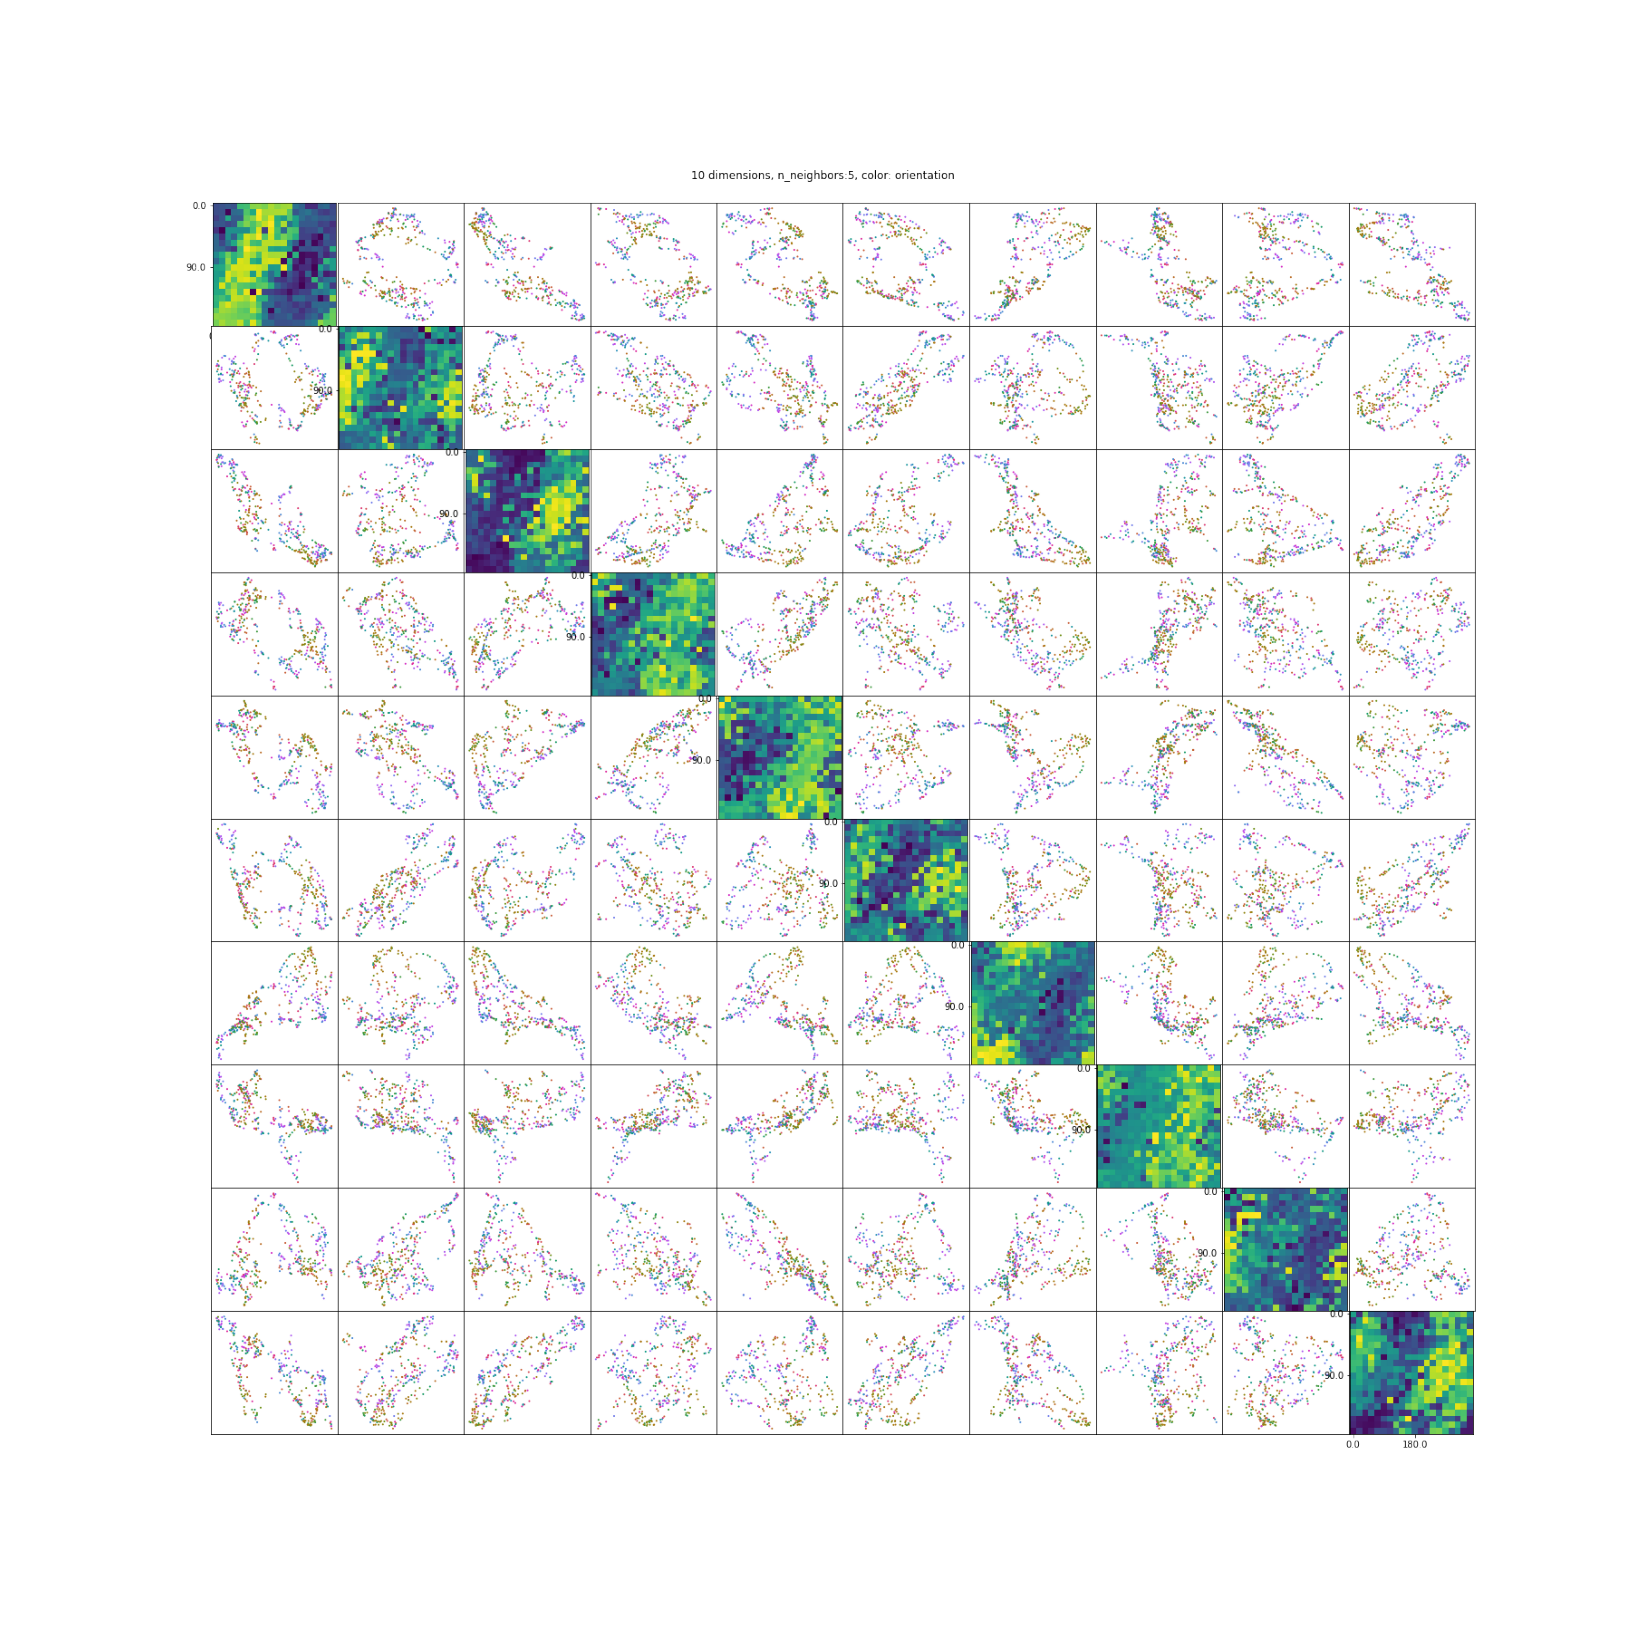

In [166]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('embed10d_fig\embed10d_umap_n_5color_cyclic_orientation.png')
fig = plt.figure(figsize=(30,30))
imgplot = plt.imshow(img)
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
# plt.subplots_adjust(left=-1, right=0.9, top=0.9, bottom=0.1)
plt.axis('off')
plt.show()

In [141]:
%matplotlib inline

@widgets.interact(color_key=widgets.RadioButtons(options=key_list[1:], description='stimulus:', disabled=False),
                 n=widgets.IntSlider(n_neighbor_list[-1], min=n_neighbor_list[0], max=n_neighbor_list[-1], step=5, description='n_neighbor', disabled=False))
# n = n_neighbor_list[2]
# color_key = 'orientation'


def umap_load_plot(color_key, n):

    

    # fig = plt.figure(figsize=(25,25))
    # for i in range(ncomp):
    #   for j in range(ncomp):
    #     ax = plt.subplot(ncomp,ncomp, j + ncomp*i + 1)
    #     if i==j:
    #       ax.imshow(embed10d[n][:,i].reshape(20,20))
    #       ax.set_xticks(np.arange(20)[::10])
    #       ax.set_xticklabels(stim_val['phase'][::10])
    #       ax.set_yticks(np.arange(20)[::10])
    #       ax.set_yticklabels(stim_val['orientation'][::10])

    #     else:
    #       ax.scatter(embed10d[n][:,j], embed10d[n][:,i], s=1, c=360*stim_val_pair[color_key]/stim_period[color_key], cmap=cmap_phase)
    #       ax.set_xticks([])
    #       ax.set_yticks([])


    # fig.suptitle('10 dimensions, n_neighbors:%d'%n + ', color: '+color_key, y=0.9)
    # plt.subplots_adjust(hspace=0, wspace=0)
    # plt.show()

interactive(children=(RadioButtons(description='stimulus:', options=('orientation', 'phase'), value='orientati…

In [38]:
for n in n_neighbor_list:
    embed10d[n] = pd.DataFrame(embed10d[n])

In [195]:
os.mkdir('persistence_umap10d')

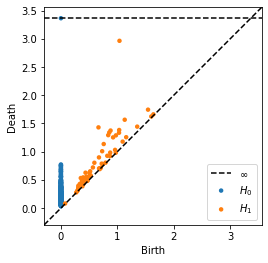

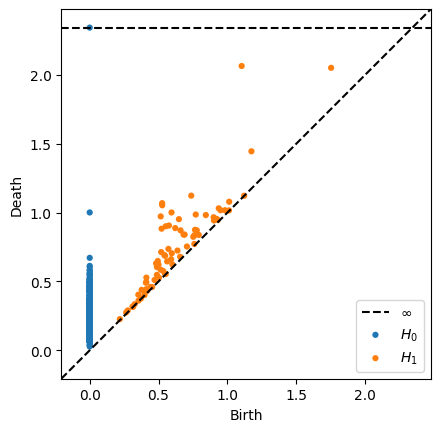

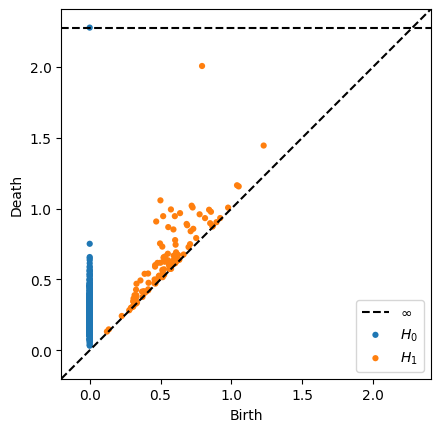

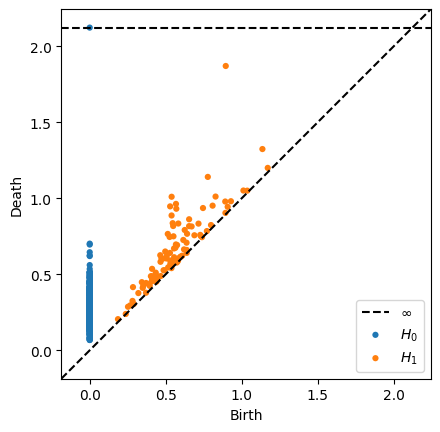

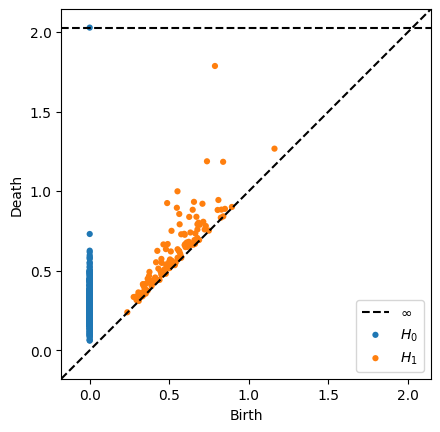

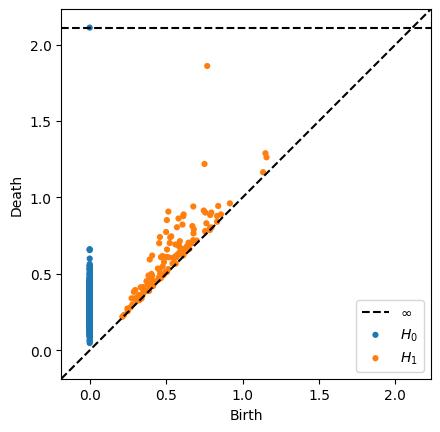

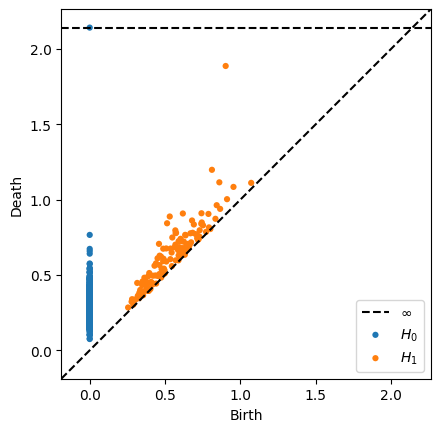

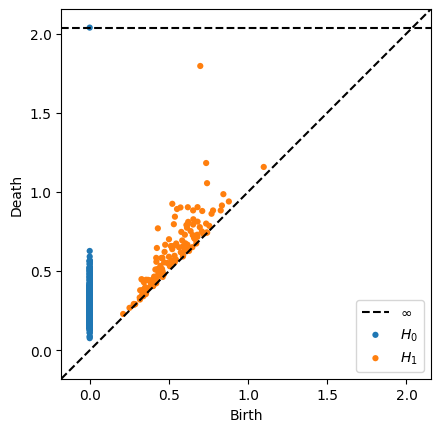

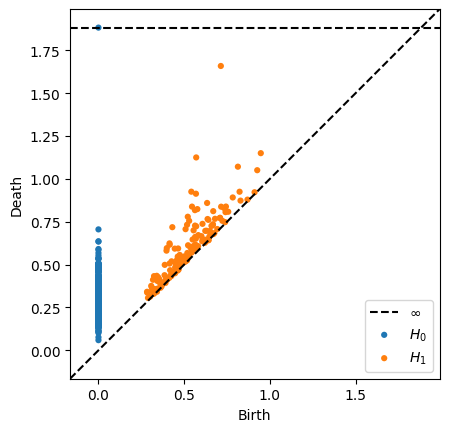

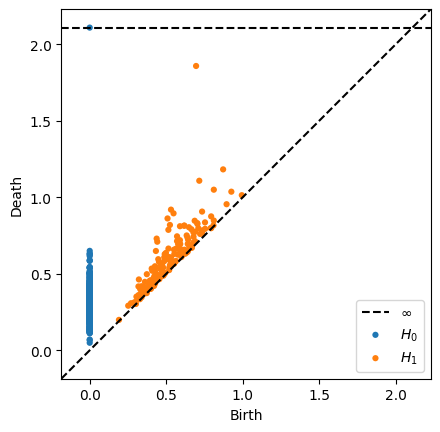

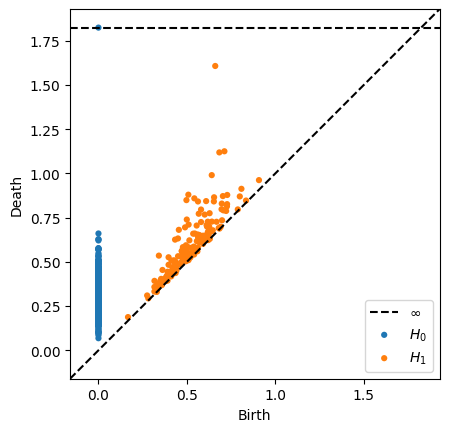

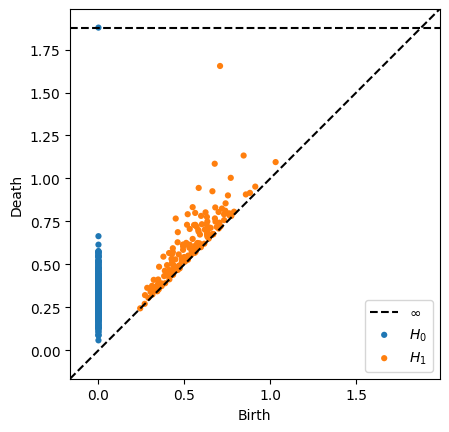

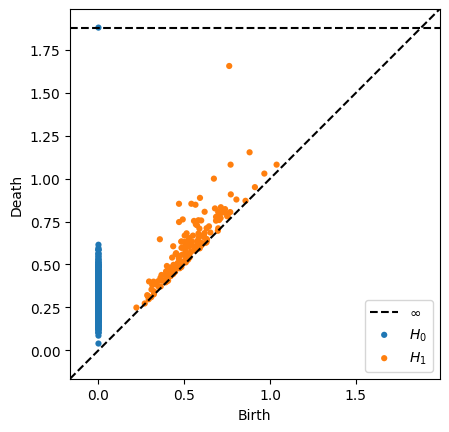

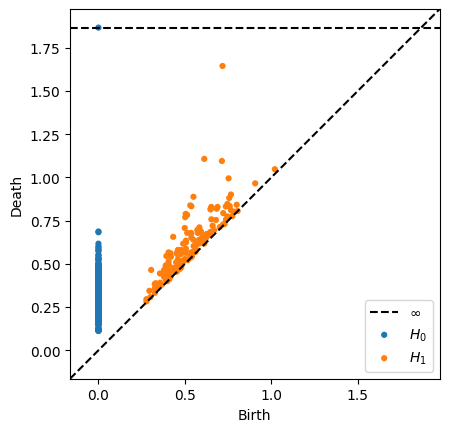

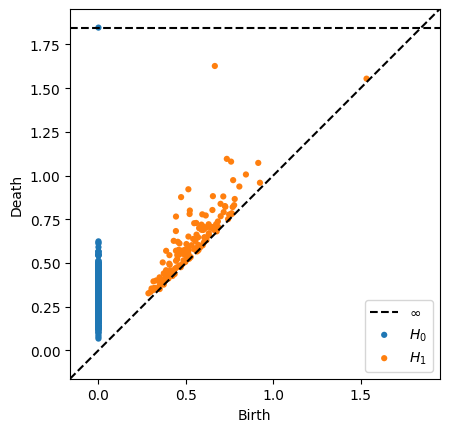

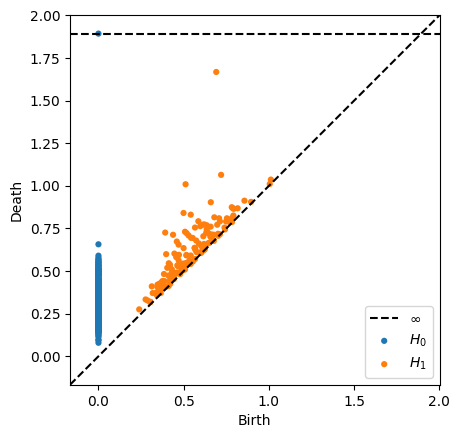

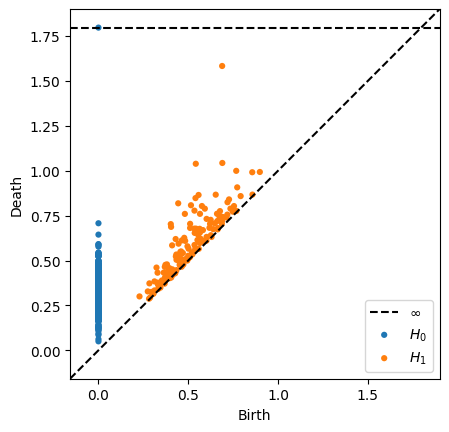

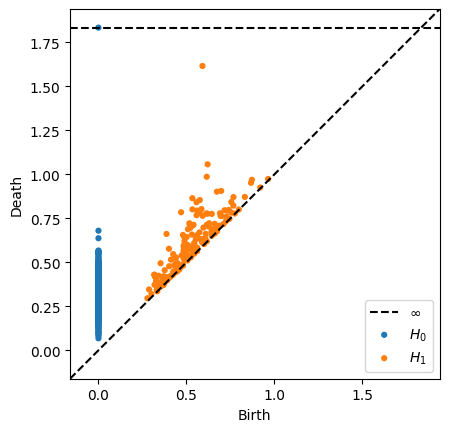

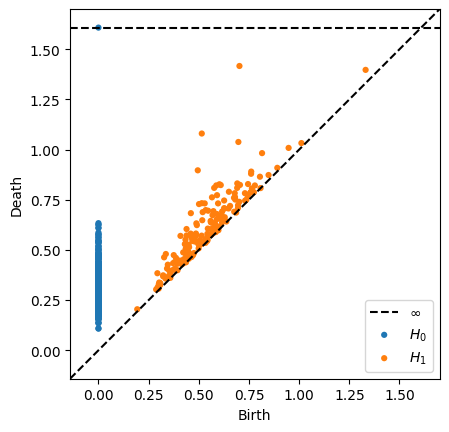

In [198]:
%matplotlib inline

for n in n_neighbor_list:
    persistence(embed10d[n],homdim=1,coeff=23, save_path='persistence_umap10d/persistence_n%d'%n+'_')

In [39]:
embed10d_df = {}
for n in n_neighbor_list:
    embed10d_df[n] = pd.DataFrame(embed10d[n])

n = 95
decoding1 = cohomological_parameterization(embed10d_df[n], coeff=23)
for key in key_list[1:]:
    decoding1[key] = stim_val_pair[key][decoding1.index]

def phasor_avg(x, period):
    return np.angle(np.sum(np.exp(2*np.pi*1j*x/period)))

# file = open('10d_decoding50.pkl', 'wb')
# pickle.dump(decoding1, file)
# file.close()

NameError: name 'cohomological_parameterization' is not defined

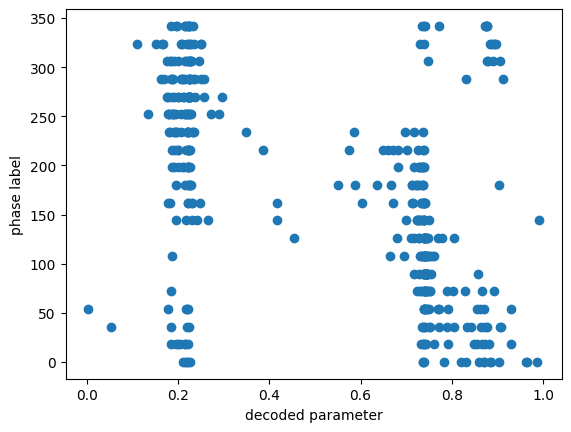

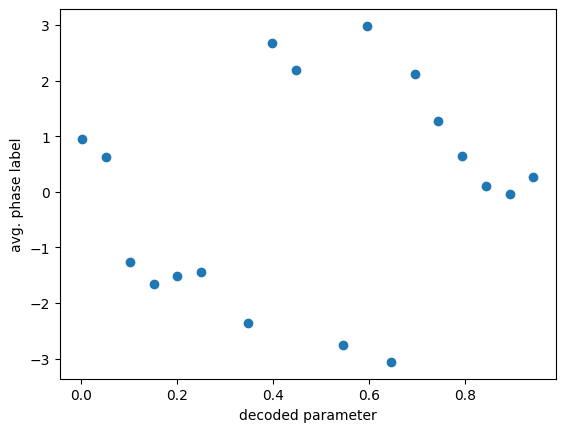

In [206]:
label=key_list[2]

plt.figure()
plt.scatter(decoding1['decoding'], stim_val_pair[label][decoding1.index])
plt.ylabel(label+' label')
plt.xlabel('decoded parameter')

statistic, bin_edges, bin_number = sts.binned_statistic(decoding1['decoding'], decoding1[label], lambda x:phasor_avg(x, period=stim_period[label]), 20)

plt.figure()
plt.scatter(bin_edges[:-1], statistic)
plt.ylabel('avg. '+label+' label')
plt.xlabel('decoded parameter')

plt.show()

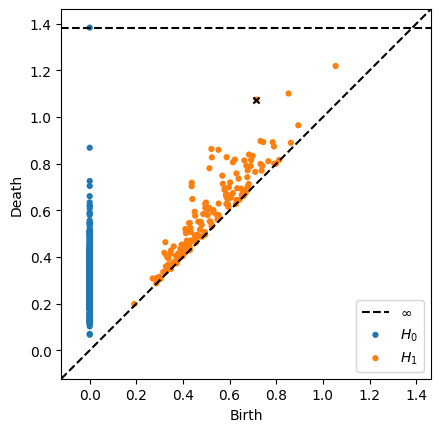

Decoding... done


In [186]:
# Decode second parameter
reduced_embed10d = remove_feature(embed10d_df[n], decoding1, cut_amplitude=0.5)
decoding2 = cohomological_parameterization(reduced_embed10d, coeff=23)

decoding2['phase'] = stim_val['pair'][decoding2.index][:,1]
decoding2['orientation'] = stim_val['pair'][decoding2.index][:,0]

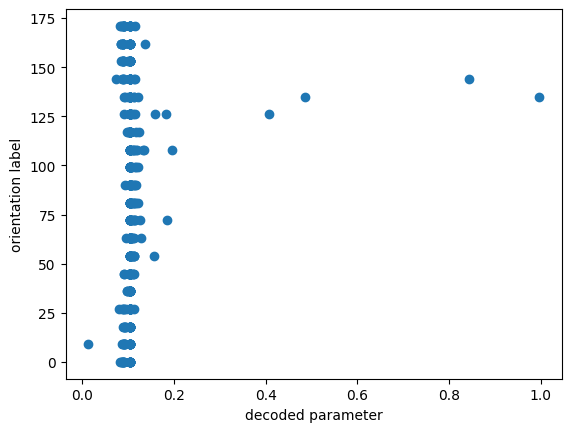

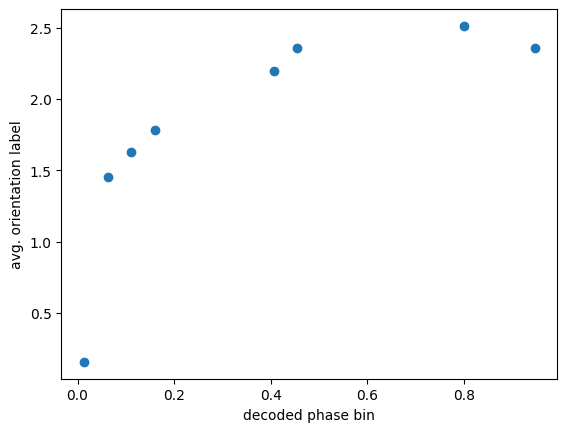

In [190]:
label = key_list[1]
plt.figure()
plt.scatter(decoding2['decoding'], stim_val_pair[label][decoding2.index])
plt.xlabel('decoded parameter')
plt.ylabel(label + ' label')

file = open('10d_decoding50.pkl', 'wb')
pickle.dump(decoding2, file)
file.close()

decoding2['phase'] = stim_val['pair'][decoding2.index][:,1]
decoding2['orientation'] = stim_val['pair'][decoding2.index][:,0]

def phasor_avg(x, period):
    return np.angle(np.sum(np.exp(2*np.pi*1j*x/period)))

statistic, bin_edges, bin_number = sts.binned_statistic(decoding2['decoding'], decoding2['orientation'], lambda x:phasor_avg(x, period=360), 20)

plt.figure()
plt.scatter(bin_edges[:-1], statistic)
plt.ylabel('avg. '+label+' label')
plt.xlabel('decoded parameter')

plt.show()

Pair

In [2]:
tau_id = 60
Z = sts.zscore(stim_hist['pair'][:, tau_id, :].T, axis=0)
# Z = Z[:, np.logical_not(np.isnan(Z[0]))]
# n_components = len(Z[0])
n_components = 20
pca = PCA(n_components)
X = pca.fit_transform(Z)

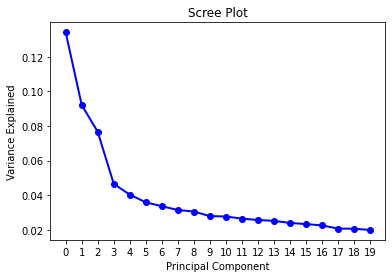

In [3]:
%matplotlib inline
PC_values = np.arange(n_components)
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xticks(np.arange(20))
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [50]:
X.shape

(400, 20)

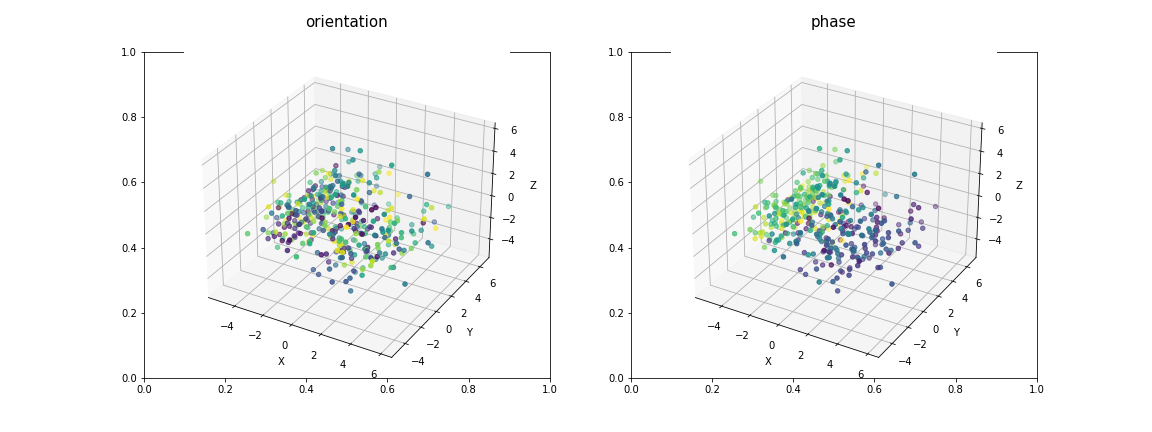

In [4]:
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
%matplotlib widget
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0] = fig.add_subplot(1, 2, 1, projection='3d')
x, y, z = X[:,0], X[:,1], X[:,2]
ax[0].scatter3D(x, y, z, c=stim_val['pair'][:,0])
ax[0].set_title("orientation", pad=25, size=15)
ax[0].set_xlabel("X")
ax[0].set_ylabel("Y")
ax[0].set_zlabel("Z")

ax[1] = fig.add_subplot(1, 2, 2, projection='3d')
x, y, z = X[:,0], X[:,1], X[:,2]
ax[1].scatter3D(x, y, z, c=stim_val['pair'][:,1])
ax[1].set_title("phase", pad=25, size=15)
ax[1].set_xlabel("X") 
ax[1].set_ylabel("Y") 
ax[1].set_zlabel("Z")
plt.show()

In [110]:
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
%matplotlib widget


@widgets.interact(phase_id = widgets.IntSlider(5,0,19))

def phase_sec(phase_id):
    fig, ax = plt.subplots(1, 2, figsize=(10, 6))
    ax[0] = fig.add_subplot(1, 2, 1, projection='3d')
    phase_sec_id = stim_val['pair'][:,1] == stim_val['phase'][phase_id]
    x, y, z = X[phase_sec_id, 0], X[phase_sec_id,1], X[phase_sec_id,2]
    ax[0].scatter3D(x, y, z, c=stim_val['pair'][phase_sec_id,0])
    ax[0].set_title("orientation", pad=25, size=15)
    ax[0].set_xlabel("X") 
    ax[0].set_ylabel("Y") 
    ax[0].set_zlabel("Z")

    ax[1] = fig.add_subplot(1, 2, 2, projection='3d')
    x, y, z = X[:,0], X[:,1], X[:,2]
    ax[1].scatter3D(x, y, z, c=stim_val['pair'][:,1])
    ax[1].set_title("phase", pad=25, size=15)
    ax[1].set_xlabel("X") 
    ax[1].set_ylabel("Y") 
    ax[1].set_zlabel("Z")
    plt.show()

interactive(children=(IntSlider(value=5, description='phase_id', max=19), Output()), _dom_classes=('widget-int…

In [42]:
stim_val_pair = stim_val['pair'].reshape(20,20,2)

In [97]:
# fix phase at 90
phase_id = 5
phase_sec_id = stim_val['pair'][:,1] == stim_val['phase'][phase_id]
XX = X[phase_sec_id]
xinit = 3 * sts.zscore(XX[:,:3], axis=0)

embed3d_fix_phase = UMAP(n_components=3, init =  xinit, n_neighbors = 15, 
             metric = 'correlation', transform_seed = 42).fit_transform(XX[:,:3])



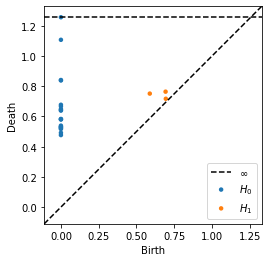

In [98]:
data_fix_phase = pd.DataFrame(embed3d_fix_phase)

%matplotlib inline
persistence(data_fix_phase,homdim=1,coeff=23)


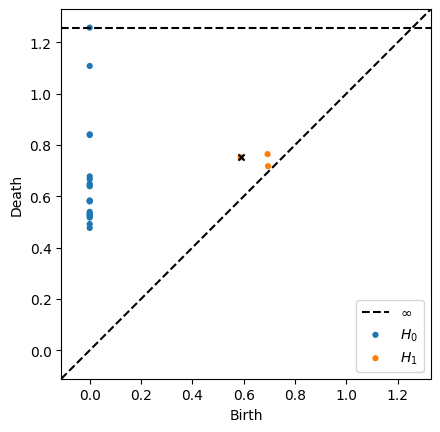

Decoding... done


In [102]:
decoding_fixed_phase_90 = cohomological_parameterization(data_fix_phase, coeff=23)

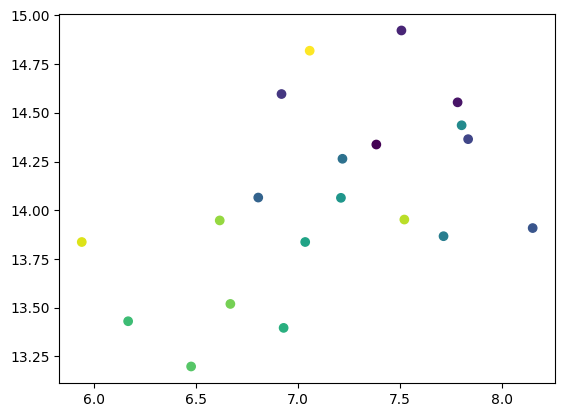

In [108]:
plt.scatter(embed3d_fix_phase[:,0], embed3d_fix_phase[:,1], c=stim_val['orientation'])

Text(0, 0.5, 'actual parameter')

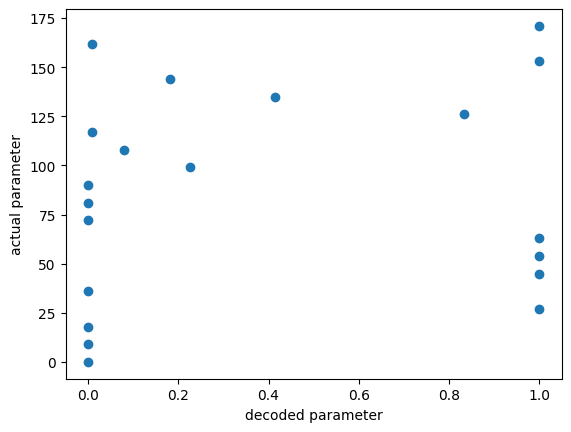

In [104]:
plt.scatter(decoding_fixed_phase_90['decoding'], stim_val['orientation'])
plt.xlabel('decoded parameter')
plt.ylabel('actual parameter')

Text(0.5, 1.0, 'n_neighbors:5')

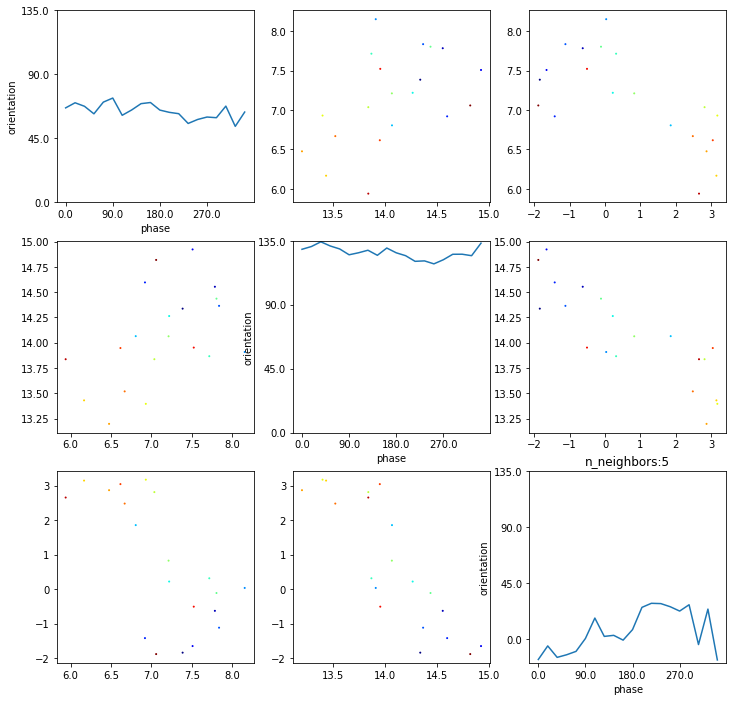

In [99]:
%matplotlib inline
plt.figure(figsize=(12,12))
for i in range(3):
  for j in range(3):
    ax = plt.subplot(3,3, j + 3*i + 1)
    if i==j:
      # ax.plot(embed3d_fix_phase[:,i])

      # ax.imshow(embed3d_fix_phase[:,i].reshape(20,20), interpolation='gaussian')
      # ax.set_xticks(np.arange(20)[::5])
      # ax.set_xticklabels(stim_val['phase'][::5])
      # ax.set_yticks(np.arange(20)[::5])
      # ax.set_yticklabels(stim_val['orientation'][::5])
      # ax.set_xlabel('phase')
      # ax.set_ylabel('orientation')

      ax.plot(embed3d_fix_phase[:,i])
      ax.set_xticks(np.arange(20)[::5])
      ax.set_xticklabels(stim_val['phase'][::5])
      ax.set_yticks(np.arange(20)[::5])
      ax.set_yticklabels(stim_val['orientation'][::5])
      ax.set_xlabel('phase')
      ax.set_ylabel('orientation')
    else:
      plt.scatter(embed3d_fix_phase[:,j], embed3d_fix_phase[:,i], s=1, c=stim_val['orientation'], cmap='jet')

plt.title('n_neighbors:%d'%5)

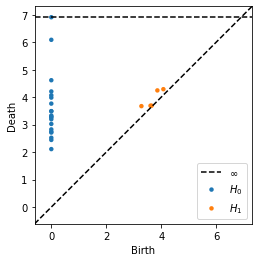

In [100]:
%matplotlib inline
data_XX = pd.DataFrame(XX[:,:10])
persistence(data_XX, homdim=1, coeff=2)

(20, 20)

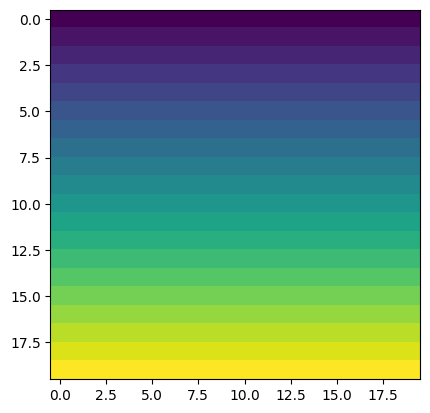

In [46]:
plt.imshow(stim_val_pair[:,:,0])

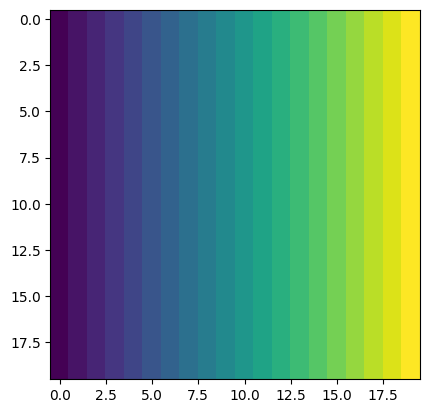

In [48]:
plt.imshow(stim_val_pair[:,:,1])

In [6]:
# @title run a manifold embedding algorithm (UMAP) in two or three dimensions. 
# !pip install umap-learn --quiet
from umap import UMAP

cut_off_dim = 5
X_reduced = X[:,:cut_off_dim]
ncomp = cut_off_dim # try 2, then try 3
xinit = 3 * sts.zscore(X_reduced, axis=0)

In [7]:
embed3d = UMAP(n_components=ncomp, init =  xinit, n_neighbors = 20, 
             metric = 'correlation', transform_seed = 42).fit_transform(X_reduced)
            
np.save('embed3d_n_neighbors20.npy', embed3d)

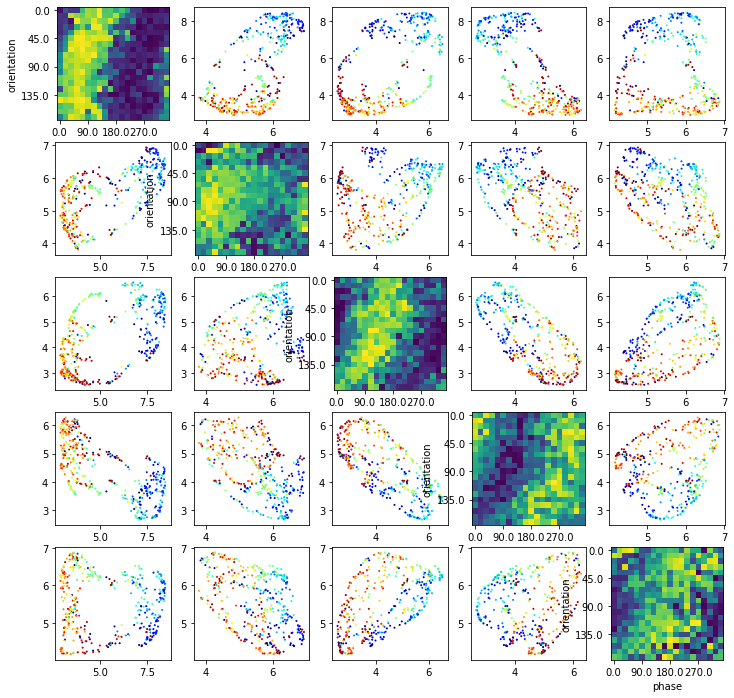

In [17]:
%matplotlib inline
plt.figure(figsize=(12,12))
for i in range(ncomp):
  for j in range(ncomp):
    ax = plt.subplot(ncomp,ncomp, j + ncomp*i + 1)
    if i==j:
      # ax.plot(embed3d[:,i])

      # ax.imshow(embed3d[:,i].reshape(20,20), interpolation='gaussian')
      # ax.set_xticks(np.arange(20)[::5])
      # ax.set_xticklabels(stim_val['phase'][::5])
      # ax.set_yticks(np.arange(20)[::5])
      # ax.set_yticklabels(stim_val['orientation'][::5])
      # ax.set_xlabel('phase')
      # ax.set_ylabel('orientation')

      ax.imshow(embed3d[:,i].reshape(20,20))
      ax.set_xticks(np.arange(20)[::5])
      ax.set_xticklabels(stim_val['phase'][::5])
      ax.set_yticks(np.arange(20)[::5])
      ax.set_yticklabels(stim_val['orientation'][::5])
      ax.set_xlabel('phase')
      ax.set_ylabel('orientation')
    else:
      plt.scatter(embed3d[:,j], embed3d[:,i], s=1, c=stim_val['pair'][:,1], cmap='jet')

plt.title('n_neighbors:%d'%)

In [22]:
embed3d = UMAP(n_components=ncomp, init =  xinit, n_neighbors = 50, 
             metric = 'correlation', transform_seed = 42).fit_transform(X_reduced)

In [20]:
embed3d.shape

(400, 5)

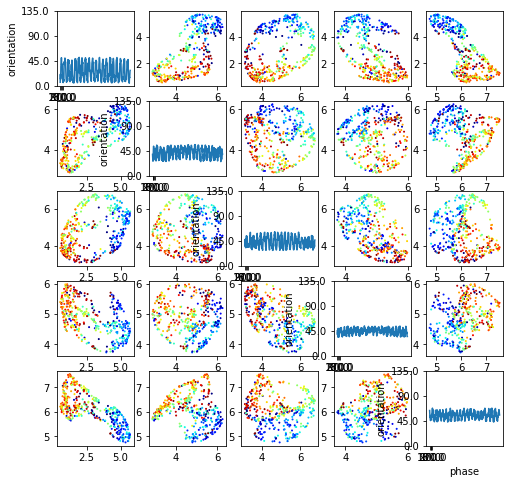

In [21]:
%matplotlib inline
plt.figure(figsize=(8,8))
for i in range(ncomp):
  for j in range(ncomp):
    ax = plt.subplot(ncomp,ncomp, j + ncomp*i + 1)
    if i==j:
      # ax.plot(embed3d[:,i])

      # ax.imshow(embed3d[:,i].reshape(20,20), interpolation='gaussian')
      # ax.set_xticks(np.arange(20)[::5])
      # ax.set_xticklabels(stim_val['phase'][::5])
      # ax.set_yticks(np.arange(20)[::5])
      # ax.set_yticklabels(stim_val['orientation'][::5])
      # ax.set_xlabel('phase')
      # ax.set_ylabel('orientation')

      ax.plot(embed3d[:,i])
      ax.set_xticks(np.arange(20)[::5])
      ax.set_xticklabels(stim_val['phase'][::5])
      ax.set_yticks(np.arange(20)[::5])
      ax.set_yticklabels(stim_val['orientation'][::5])
      ax.set_xlabel('phase')
      ax.set_ylabel('orientation')
    else:
      plt.scatter(embed3d[:,j], embed3d[:,i], s=1, c=stim_val['pair'][:,1], cmap='jet')


Umap cohomological decoding

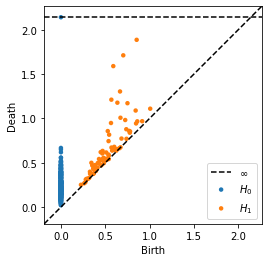

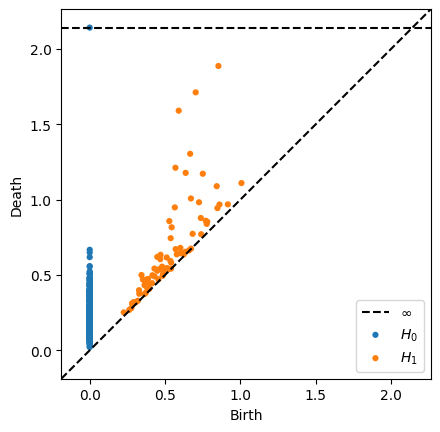

In [23]:
%matplotlib inline
data = pd.DataFrame(embed3d)

persistence(data,homdim=1,coeff=2)
persistence(data,homdim=1,coeff=23)

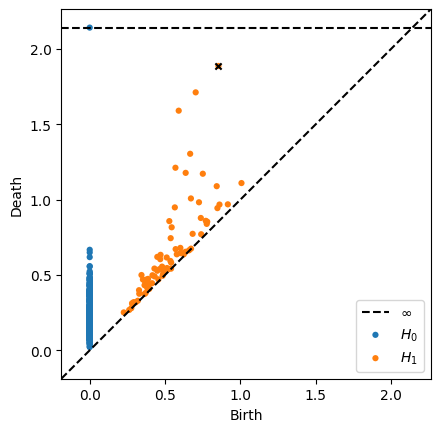

Decoding... done


In [24]:
decoding1 = cohomological_parameterization(data, coeff=23)

Text(0, 0.5, 'actual parameter')

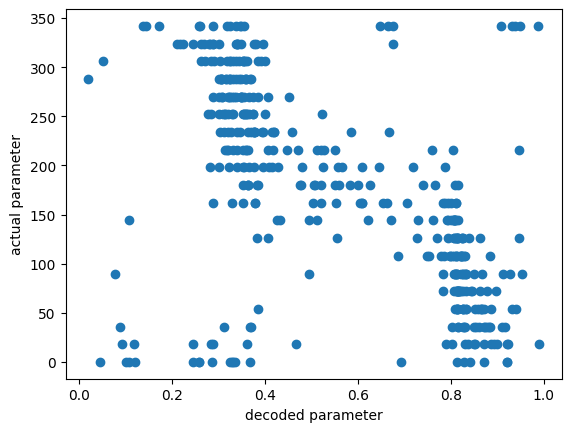

In [25]:
plt.scatter(decoding1['decoding'], stim_val['pair'][decoding1.index][:,1])
plt.xlabel('decoded parameter')
plt.ylabel('actual parameter')

In [30]:

file = open('decoding50.pkl', 'wb')
pickle.dump(decoding1, file)
file.close()

Binning

In [21]:
decoding1['phase'] = stim_val['pair'][decoding1.index][:,1]
decoding1['orientation'] = stim_val['pair'][decoding1.index][:,0]
decoding1

decoding  phase  orientation
0    0.437717    0.0          0.0
1    0.449213   18.0          0.0
2    0.429066   36.0          0.0
3    0.424594   54.0          0.0
4    0.816654   72.0          0.0
..        ...    ...          ...
395  0.438846  270.0        171.0
396  0.441466  288.0        171.0
397  0.462445  306.0        171.0
398  0.672323  324.0        171.0
399  0.677862  342.0        171.0

[400 rows x 3 columns]

In [22]:
help(sts.binned_statistic_2d)

Help on function binned_statistic_2d in module scipy.stats._binned_statistic:

binned_statistic_2d(x, y, values, statistic='mean', bins=10, range=None, expand_binnumbers=False)
    Compute a bidimensional binned statistic for one or more sets of data.
    
    This is a generalization of a histogram2d function.  A histogram divides
    the space into bins, and returns the count of the number of points in
    each bin.  This function allows the computation of the sum, mean, median,
    or other statistic of the values (or set of values) within each bin.
    
    Parameters
    ----------
    x : (N,) array_like
        A sequence of values to be binned along the first dimension.
    y : (N,) array_like
        A sequence of values to be binned along the second dimension.
    values : (N,) array_like or list of (N,) array_like
        The data on which the statistic will be computed.  This must be
        the same shape as `x`, or a list of sequences - each with the same
        shape as

In [23]:
def phasor_avg(x, period):
    return np.angle(np.sum(np.exp(2*np.pi*1j*x/period)))

In [24]:
statistic, bin_edges, bin_number = sts.binned_statistic(decoding1['decoding'], decoding1['phase'], lambda x:phasor_avg(x, period=360), 20)

Text(0.5, 0, 'decoded phase bin')

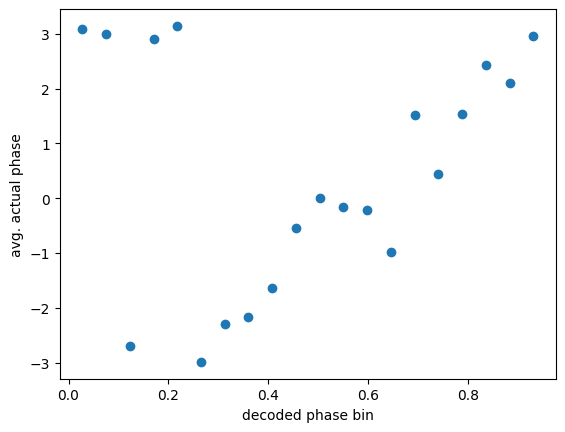

In [25]:
plt.scatter(bin_edges[:-1], statistic)
plt.ylabel('avg. actual phase')
plt.xlabel('decoded phase bin')

Remove feature

In [26]:
%matplotlib inline
plot_data(data,transformation="PCA", labels=decoding1,
          colors=["Twilight","Viridis","Twilight","Viridis","Twilight"])


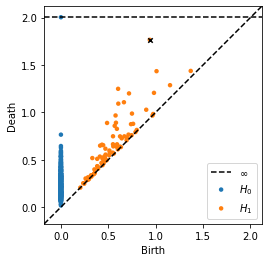

Decoding... done


In [27]:
# Decode second parameter
reduced_data = remove_feature(data, decoding1, cut_amplitude=0.5)
decoding2 = cohomological_parameterization(reduced_data, coeff=23)

In [30]:
# data['phase'] = stim_val['pair'][:,1]
# data['orientation'] = stim_val['pair'][:,0]
# data

In [31]:
decoding2['phase'] = stim_val['pair'][decoding2.index][:,1]
decoding2['orientation'] = stim_val['pair'][decoding2.index][:,0]
decoding2

decoding  phase  orientation
0    0.217130    0.0          0.0
1    0.329715   18.0          0.0
2    0.244882   36.0          0.0
3    0.260258   54.0          0.0
4    0.781878   72.0          0.0
..        ...    ...          ...
395  0.204446  270.0        171.0
396  0.207642  288.0        171.0
397  0.181627  306.0        171.0
398  0.552974  324.0        171.0
399  0.558591  342.0        171.0

[400 rows x 3 columns]

In [32]:
def phasor_avg(x, period):
    return np.angle(np.sum(np.exp(2*np.pi*1j*x/period)))

In [33]:
statistic, bin_edges, bin_number = sts.binned_statistic(decoding2['decoding'], decoding2['orientation'], lambda x:phasor_avg(x, period=360), 20)

Text(0.5, 0, 'decoded phase bin')

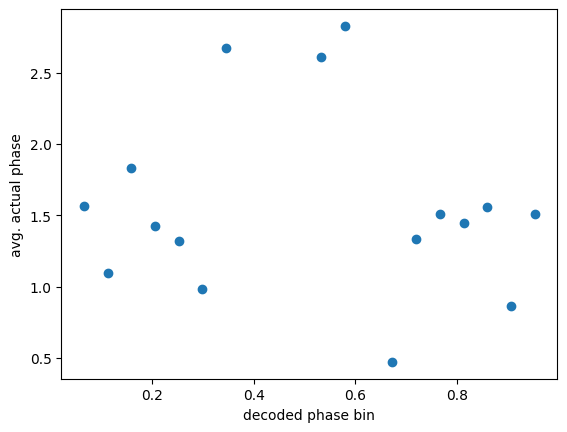

In [34]:
plt.scatter(bin_edges[:-1], statistic)
plt.ylabel('avg. actual phase')
plt.xlabel('decoded phase bin')

Text(0, 0.5, 'actual parameter')

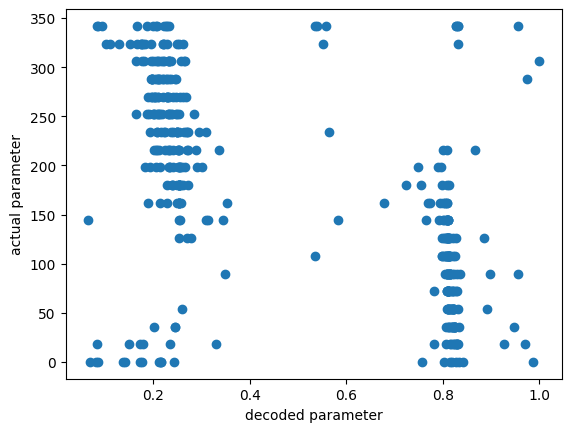

In [35]:
plt.scatter(decoding2['decoding'], stim_val['pair'][decoding2.index][:,1])
plt.xlabel('decoded parameter')
plt.ylabel('actual parameter')

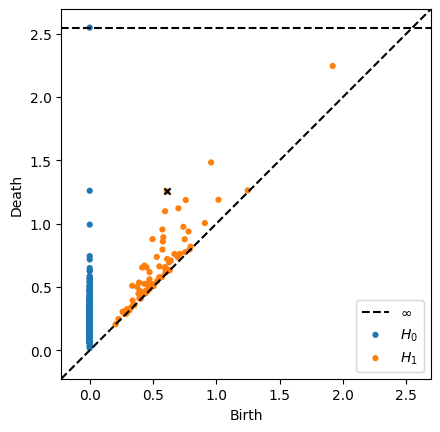

Decoding... done


In [36]:
# Decode second parameter
reduced_data2 = remove_feature(reduced_data, decoding2, cut_amplitude=0.5)
decoding3 = cohomological_parameterization(reduced_data2, coeff=23)
decoding3['phase'] = stim_val['pair'][decoding3.index][:,1]
decoding3['orientation'] = stim_val['pair'][decoding3.index][:,0]

Text(0, 0.5, 'actual parameter')

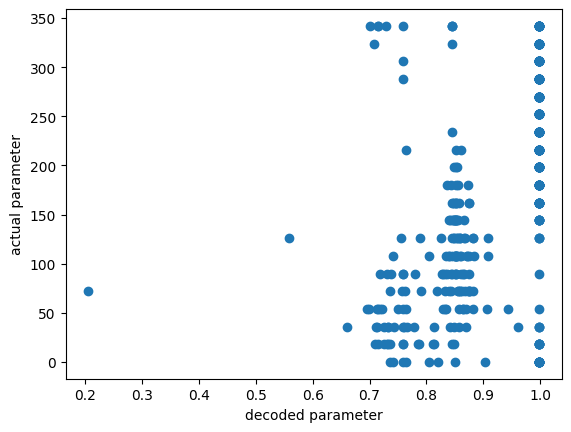

In [37]:
plt.scatter(decoding3['decoding'], stim_val['pair'][decoding3.index][:,1])
plt.xlabel('decoded parameter')
plt.ylabel('actual parameter')

Text(0.5, 0, 'decoded phase bin')

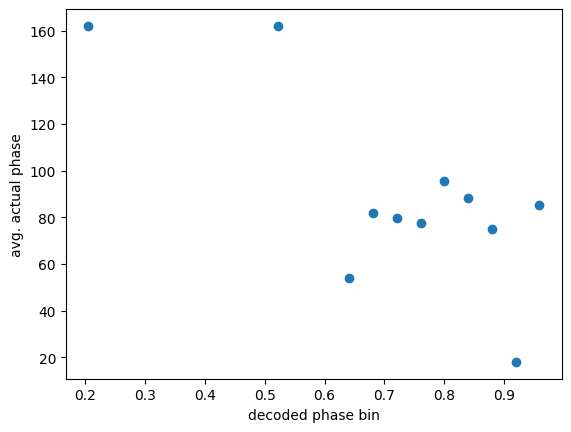

In [39]:
statistic, bin_edges, bin_number = sts.binned_statistic(decoding3['decoding'], decoding3['orientation'], lambda x:np.mean(x), 20)
plt.scatter(bin_edges[:-1], statistic)
plt.ylabel('avg. actual phase')
plt.xlabel('decoded phase bin')

Cohomological decoding

In [40]:
data = stim_hist['pair'][:, tau_id, :].T
data.shape

(400, 40)

Applying density filtration... done
PCA explained variance:
[0.09915744 0.09316687 0.05514839 0.04694839 0.0445427  0.04056454
 0.03954761 0.03686482 0.03428718 0.03158143]


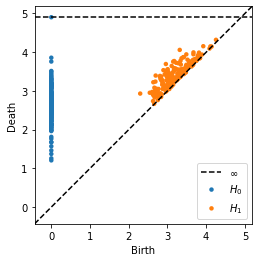

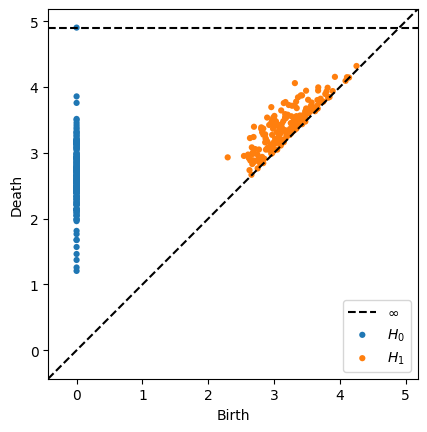

In [66]:
%matplotlib inline
tau_id = 0
data = stim_hist['pair'][:, tau_id, :].T
data = pd.DataFrame(data)

## Apply noise reduction
data = sts.zscore(data, axis=0)
data = density_filtration(data, 15, 0.5)
data = PCA_reduction(data, 10)
# data = z_cutoff(data,2)

## Analyze shape
persistence(data,homdim=1,coeff=2)
persistence(data,homdim=1,coeff=23)

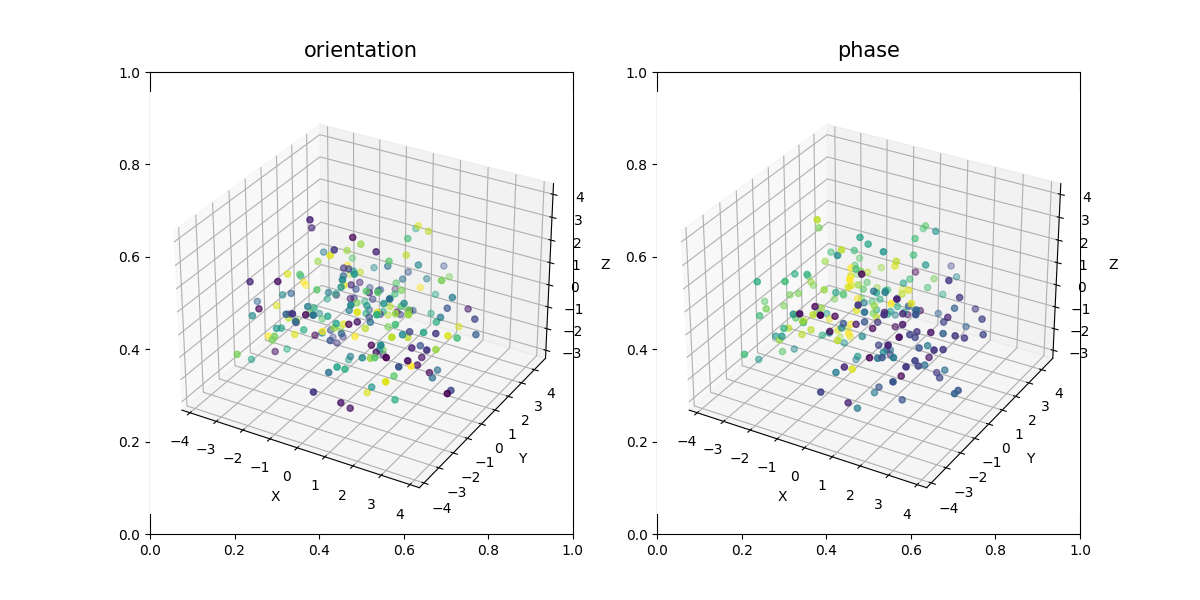

In [67]:
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
%matplotlib widget
X = np.array(data)
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0] = fig.add_subplot(1, 2, 1, projection='3d')
x, y, z = X[:,0], X[:,1], X[:,2]
ax[0].scatter3D(x, y, z, c=stim_val['pair'][data.index][:,0])
ax[0].set_title("orientation", pad=25, size=15)
ax[0].set_xlabel("X") 
ax[0].set_ylabel("Y") 
ax[0].set_zlabel("Z")

ax[1] = fig.add_subplot(1, 2, 2, projection='3d')
x, y, z = X[:,0], X[:,1], X[:,2]
ax[1].scatter3D(x, y, z, c=stim_val['pair'][data.index][:,1])
ax[1].set_title("phase", pad=25, size=15)
ax[1].set_xlabel("X") 
ax[1].set_ylabel("Y") 
ax[1].set_zlabel("Z")
plt.show()

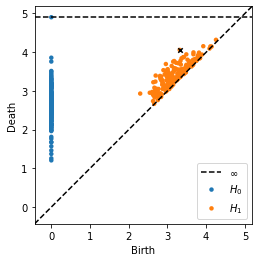

Decoding... done


In [68]:
## Decode first parameter
%matplotlib inline
decoding1 = cohomological_parameterization(data, coeff=23)
# show_feature(decoding1)
# plot_mean_against_index(data,decoding1,"orientation")
# plot_mean_against_index(data,decoding1,"phase")
# plot_data(data,transformation="PCA", labels=decoding1,
#           colors=["Twilight","Viridis","Twilight","Viridis","Twilight"])

## Decode second parameter
# reduced_data = remove_feature(data, decoding1, cut_amplitude=0.5)
# decoding2 = cohomological_parameterization(reduced_data, coeff=23)
# show_feature(decoding2)
# plot_mean_against_index(data,decoding2,"orientation")
# plot_mean_against_index(data,decoding2,"phase")
# plot_data(data,transformation="PCA", labels=decoding2,
#           colors=["Twilight","Viridis","Twilight","Viridis","Twilight"])


In [69]:
stim_val['pair'][:,1].shape

(400,)

In [70]:
decoding1

decoding
261  0.932910
396  0.930706
322  0.932025
253  0.930178
113  0.931438
..        ...
310  0.930397
327  0.932556
207  0.929700
160  0.929805
233  0.931270

[200 rows x 1 columns]

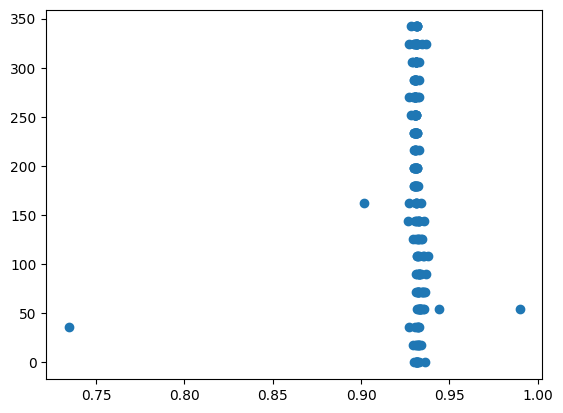

In [71]:
plt.scatter(decoding1, stim_val['pair'][decoding1.index][:,1])

Orientation

In [22]:
tau_id = 60
Z = sts.zscore(stim_hist['orientation'][:, tau_id, :].T)
# Z = Z[:, np.logical_not(np.isnan(Z[0]))]
# n_components = len(Z[0])
n_components = 20
pca = PCA(n_components)
X = pca.fit_transform(Z)

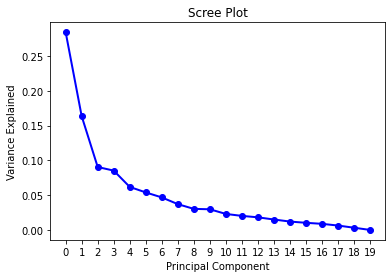

In [23]:
%matplotlib inline
PC_values = np.arange(n_components)
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xticks(np.arange(20))
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

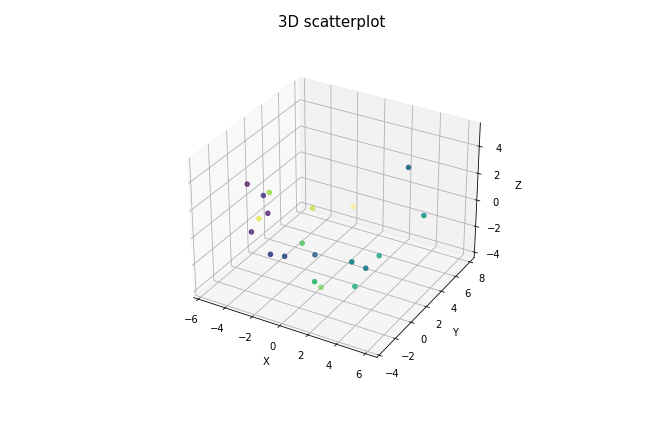

In [24]:
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

%matplotlib widget
fig = plt.figure(figsize=(9, 6))
ax = plt.axes(projection='3d')
x, y, z = X[:,0], X[:,1], X[:,2]
ax.scatter3D(x, y, z, c=stim_val['orientation'])
ax.set_title("3D scatterplot", pad=25, size=15)
ax.set_xlabel("X") 
ax.set_ylabel("Y") 
ax.set_zlabel("Z")

plt.show()

In [25]:
# @title run a manifold embedding algorithm (UMAP) in two or three dimensions. 
# !pip install umap-learn --quiet
from umap import UMAP

cut_off_dim = 3
X_reduced = X[:,:cut_off_dim]
ncomp = cut_off_dim # try 2, then try 3
xinit = 3 * sts.zscore(X_reduced, axis=0)

In [26]:
embed3d = UMAP(n_components=ncomp, init =  xinit, n_neighbors = 25, 
             metric = 'correlation', transform_seed = 42).fit_transform(X_reduced)

C:\Users\arash\AppData\Local\Programs\Python\Python38\lib\site-packages\umap\umap_.py:2344: UserWarning:

n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1



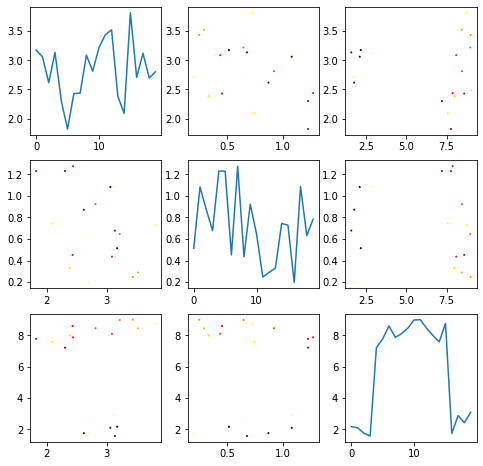

In [27]:
%matplotlib inline
plt.figure(figsize=(8,8))
for i in range(ncomp):
  for j in range(ncomp):
    ax = plt.subplot(ncomp,ncomp, j + ncomp*i + 1)
    if i==j:
        ax.plot(embed3d[:,i])
    
    #   ax.set_xticks(np.arange(20)[::5])
    #   ax.set_xticklabels(stim_val['phase'][::5])
    #   ax.set_yticks(np.arange(20)[::5])
    #   ax.set_yticklabels(stim_val['orientation'][::5])
    #   ax.set_xlabel('phase')
    #   ax.set_ylabel('orientation')
    else:
      plt.scatter(embed3d[:,j], embed3d[:,i], s  = 1, c=stim_val['orientation'], cmap = 'hot')


Phase

PCA explained variance:
[0.23149159 0.14506975 0.11324264 0.07172362 0.07017238]


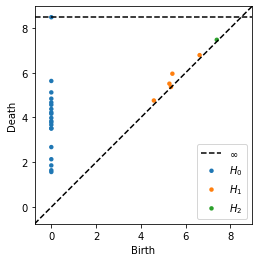

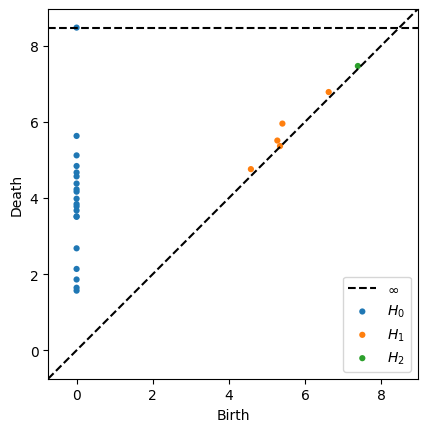

In [85]:
%matplotlib inline

tau_id = 0
pca = PCA(n_components)
X = pca.fit_transform(Z)
data = stim_hist['phase'][:, tau_id, :].T
data = pd.DataFrame(data)

## Apply noise reduction
data = sts.zscore(data, axis=0)
data = PCA_reduction(data, 5)
# data = z_cutoff(data,2)
# data = density_filtration(data, 10, 0.9)

## Analyze shape
persistence(data,homdim=2,coeff=2)
persistence(data,homdim=2,coeff=23)

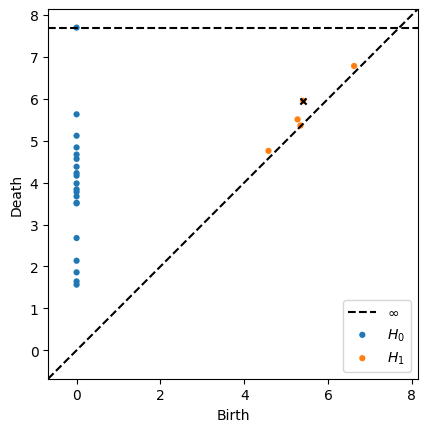

Decoding... done


In [86]:
decoding1 = cohomological_parameterization(data, coeff=23)


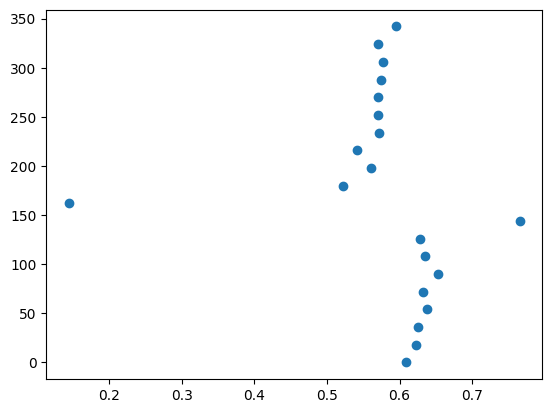

In [87]:
plt.scatter(decoding1, stim_val['pair'][decoding1.index][:,1])

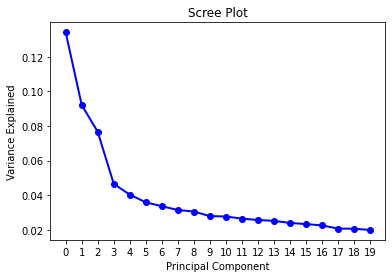

In [88]:
%matplotlib inline
PC_values = np.arange(n_components)
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xticks(np.arange(20))
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

ValueError: 'c' argument has 20 elements, which is inconsistent with 'x' and 'y' with size 400.

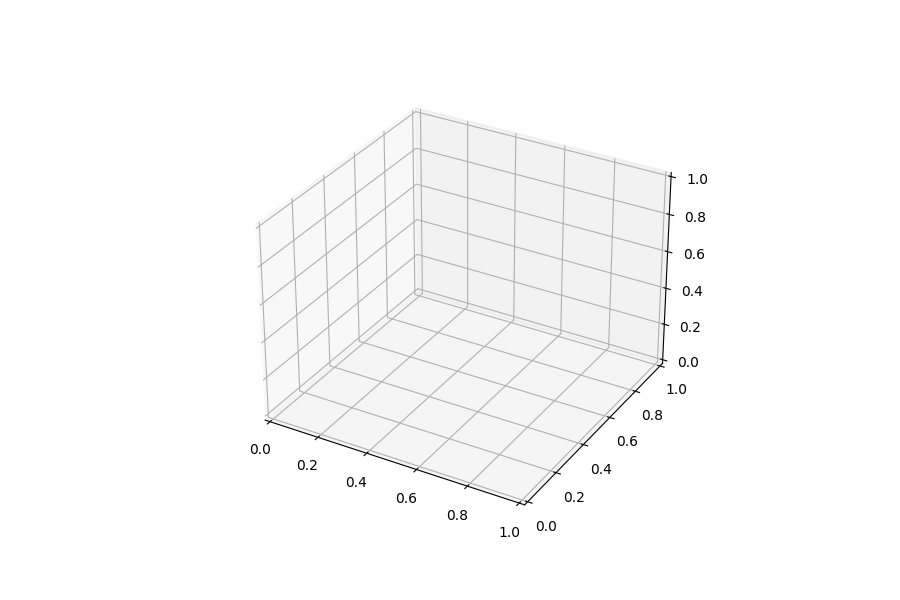

In [89]:
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

%matplotlib widget
fig = plt.figure(figsize=(9, 6))
ax = plt.axes(projection='3d')
x, y, z = X[:,0], X[:,1], X[:,2]
ax.scatter3D(x, y, z, c=stim_val['orientation'])
ax.set_title("3D scatterplot", pad=25, size=15)
ax.set_xlabel("X") 
ax.set_ylabel("Y") 
ax.set_zlabel("Z")

plt.show()

In [131]:
# @title run a manifold embedding algorithm (UMAP) in two or three dimensions. 
# !pip install umap-learn --quiet
from umap import UMAP

cut_off_dim = 3
X_reduced = X[:,:cut_off_dim]
ncomp = cut_off_dim # try 2, then try 3
xinit = 3 * sts.zscore(X_reduced, axis=0)

In [132]:
embed3d = UMAP(n_components=ncomp, init =  xinit, n_neighbors = 25, 
             metric = 'correlation', transform_seed = 42).fit_transform(X_reduced)

C:\Users\arash\AppData\Local\Programs\Python\Python38\lib\site-packages\umap\umap_.py:2344: UserWarning:

n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1



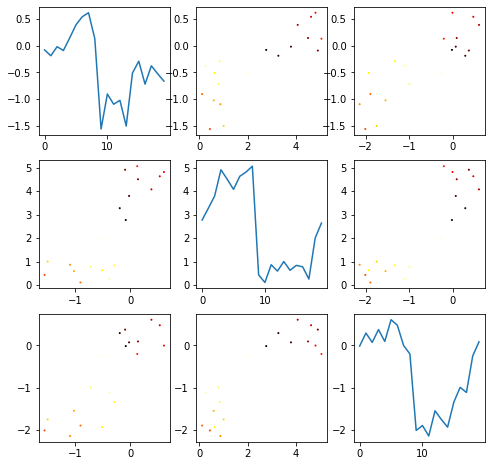

In [36]:
%matplotlib inline
plt.figure(figsize=(8,8))
for i in range(ncomp):
  for j in range(ncomp):
    ax = plt.subplot(ncomp,ncomp, j + ncomp*i + 1)
    if i==j:
        ax.plot(embed3d[:,i])
    
    #   ax.set_xticks(np.arange(20)[::5])
    #   ax.set_xticklabels(stim_val['phase'][::5])
    #   ax.set_yticks(np.arange(20)[::5])
    #   ax.set_yticklabels(stim_val['orientation'][::5])
    #   ax.set_xlabel('phase')
    #   ax.set_ylabel('orientation')
    else:
      plt.scatter(embed3d[:,j], embed3d[:,i], s  = 1, c=stim_val['orientation'], cmap = 'hot')
